<a href="https://colab.research.google.com/github/Pankajace/EDA_CAPSTONE1/blob/main/BIKE_SHARING_DEMAND_PREDICTION_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<font color='blue'>**BIKE SHARING DEMAND PREDICTION**

####**PROJECT TYPE = REGRESSION**
####**CONTRIBUTION = INDIVIDUAL**
####**NAME = PANKAJ RAWAT**

#<font color='blue'>**GitHub Link -**

#<font color='blue'>**Problem Statement**
<font color='blue'>

- Currently rental bikes are introduced in many cities for the enhancement of mobility comfort.The client is Seoul Bike,which participates in a bike share program in seoul, south korea.An accurate prediction of bike count is critical to the success of the seoul bike share program. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time.Eventually, providing the city with a stable supply of rental bikes becomes a major concern.

- The final aim of this project is to make the prediction of bike count required at each hour for the stable supply of rental bikes.

In [ ]:
#Problem Description - Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.

In [ ]:
# importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# setting max display column limit to 20
pd.set_option("display.max_columns", 20)

#set style
plt.style.use('seaborn')

<ipython-input-3-009e0176d67c>:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [ ]:
# Reading CSV file. 
bike_df=pd.read_csv('SeoulBikeData.csv',encoding="latin")

In [ ]:
bike_df.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

In [ ]:
bike_df.tail()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
8755  30/11/2018               1003    19              4.2           34   
8756  30/11/2018                764    20              3.4           37   
8757  30/11/2018                694    21              2.6           39   
8758  30/11/2018                712    22              2.1           41   
8759  30/11/2018                584    23              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
8755               2.6              1894                      -10.3   
8756               2.3              2000                       -9.9   
8757               0.3              1968                       -9.9   
8758               1.0              1859                       -9.8   
8759               1.3              1909                       -9.3   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
8755                      0.0           0.0            0.0  Autumn   
8756                      0.0           0.0            0.0  Autumn   
8757                      0.0           0.0            0.0  Autumn   
8758                      0.0           0.0            0.0  Autumn   
8759                      0.0           0.0            0.0  Autumn   

         Holiday Functioning Day  
8755  No Holiday             Yes  
8756  No Holiday             Yes  
8757  No Holiday             Yes  
8758  No Holiday             Yes  
8759  No Holiday             Yes

In [ ]:
#let's check the shape of our dataset
bike_df.shape

(8760, 14)

In [ ]:
#let's have a look at the information of our dataset
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [ ]:
# so we have 0 null values or 0 missing values
#Dtype of 'Date' column needs to be changed
# Encoding needed for 3 columns - 'Seasons','Holiday','Functioning Day'.


In [ ]:
# Renaming columns for better use
bike_df.rename(columns={'Rented Bike Count':'Rented_Bike_Count','Temperature(°C)':'Temperature','Humidity(%)':'Humidity','Wind speed (m/s)':'Wind_speed',
                       'Visibility (10m)':'Visibility','Dew point temperature(°C)':'Dew_point_temperature', 'Solar Radiation (MJ/m2)':'Solar_Radiation',
                        'Rainfall(mm)':'Rainfall','Snowfall (cm)':'Snowfall','Functioning Day':'Functioning_Day'},inplace=True)

In [ ]:
# Change The datatype of Date columns to extract 'Month' ,'Day', "year". so  further we can analyze the Bike rentals with respect to year months and days.
bike_df['Date']=bike_df['Date'].astype('datetime64[ns]')

     

In [ ]:
# Creating new columns 'Month', 'Year' ,'Day.
bike_df['Month']=bike_df['Date'].dt.month

bike_df['Day']=bike_df['Date'].dt.day_name()                  #dt.day_name() and dt.month_name()  will give day names and month names
                                                   

In [ ]:
#  Creating new column and Encoding with 1 if its weekend and 0 if its Weekdays.
bike_df['Weekdays_or_weekend']=bike_df['Day'].apply(lambda x: 1 if x=='Saturday' or x=='Sunday' else 0)

In [ ]:
# check the Newly Created columns
bike_df.head(2)

Date  Rented_Bike_Count  Hour  Temperature  Humidity  Wind_speed  \
0 2017-01-12                254     0         -5.2        37         2.2   
1 2017-01-12                204     1         -5.5        38         0.8   

   Visibility  Dew_point_temperature  Solar_Radiation  Rainfall  Snowfall  \
0        2000                  -17.6              0.0       0.0       0.0   
1        2000                  -17.6              0.0       0.0       0.0   

  Seasons     Holiday Functioning_Day  Month       Day  Weekdays_or_weekend  
0  Winter  No Holiday             Yes      1  Thursday                    0  
1  Winter  No Holiday             Yes      1  Thursday                    0

In [ ]:
# Now We can Drop Day and Date columns.

bike_df.drop(['Date',"Day"],axis=1 ,inplace=True)

In [ ]:
# No. of bikes rented season wise
bike_df['Seasons'].value_counts()

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

In [ ]:
# no. of bikes rented on holidays or non holidays
bike_df['Holiday'].value_counts()

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

In [ ]:
# no. of bikes rented month wise
bike_df['Month'].value_counts()

1     744
3     744
5     744
7     744
8     744
10    744
12    744
4     720
6     720
9     720
11    720
2     672
Name: Month, dtype: int64

In [ ]:
# no. of bikes rented for weekdays or weekends categories
bike_df['Weekdays_or_weekend'].value_counts()

0    6216
1    2544
Name: Weekdays_or_weekend, dtype: int64

In [ ]:
# now let's check the summary of bike data
bike_df.describe()

Rented_Bike_Count         Hour  Temperature     Humidity   Wind_speed  \
count        8760.000000  8760.000000  8760.000000  8760.000000  8760.000000   
mean          704.602055    11.500000    12.882922    58.226256     1.724909   
std           644.997468     6.922582    11.944825    20.362413     1.036300   
min             0.000000     0.000000   -17.800000     0.000000     0.000000   
25%           191.000000     5.750000     3.500000    42.000000     0.900000   
50%           504.500000    11.500000    13.700000    57.000000     1.500000   
75%          1065.250000    17.250000    22.500000    74.000000     2.300000   
max          3556.000000    23.000000    39.400000    98.000000     7.400000   

        Visibility  Dew_point_temperature  Solar_Radiation     Rainfall  \
count  8760.000000            8760.000000      8760.000000  8760.000000   
mean   1436.825799               4.073813         0.569111     0.148687   
std     608.298712              13.060369         0.868746     1.128193   
min      27.000000             -30.600000         0.000000     0.000000   
25%     940.000000              -4.700000         0.000000     0.000000   
50%    1698.000000               5.100000         0.010000     0.000000   
75%    2000.000000              14.800000         0.930000     0.000000   
max    2000.000000              27.200000         3.520000    35.000000   

          Snowfall        Month  Weekdays_or_weekend  
count  8760.000000  8760.000000          8760.000000  
mean      0.075068     6.526027             0.290411  
std       0.436746     3.448048             0.453978  
min       0.000000     1.000000             0.000000  
25%       0.000000     4.000000             0.000000  
50%       0.000000     7.000000             0.000000  
75%       0.000000    10.000000             1.000000  
max       8.800000    12.000000             1.000000

In [ ]:
#let's  again check our null values now
bike_df.isnull().sum()

Rented_Bike_Count        0
Hour                     0
Temperature              0
Humidity                 0
Wind_speed               0
Visibility               0
Dew_point_temperature    0
Solar_Radiation          0
Rainfall                 0
Snowfall                 0
Seasons                  0
Holiday                  0
Functioning_Day          0
Month                    0
Weekdays_or_weekend      0
dtype: int64

In [ ]:
# checking for duplicates values in the data
bike_df.duplicated().sum()

0

In [ ]:
#Performing EDA now

In [ ]:

# create numeric columns list.
numeric_col=bike_df.describe().columns.tolist()
numeric_col

['Rented_Bike_Count',
 'Hour',
 'Temperature',
 'Humidity',
 'Wind_speed',
 'Visibility',
 'Dew_point_temperature',
 'Solar_Radiation',
 'Rainfall',
 'Snowfall',
 'Month',
 'Weekdays_or_weekend']

In [ ]:
# create categorical column list
categorical_columns= list(set(bike_df.columns) - set(bike_df.describe().columns))
categorical_columns


['Functioning_Day', 'Seasons', 'Holiday']

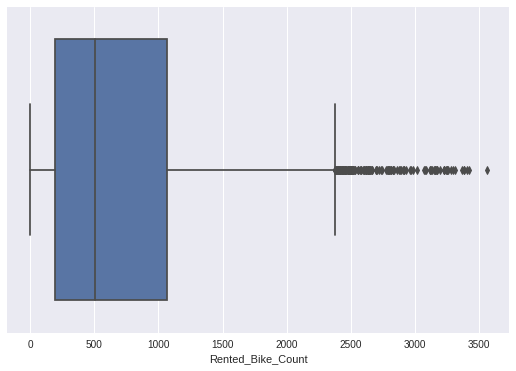

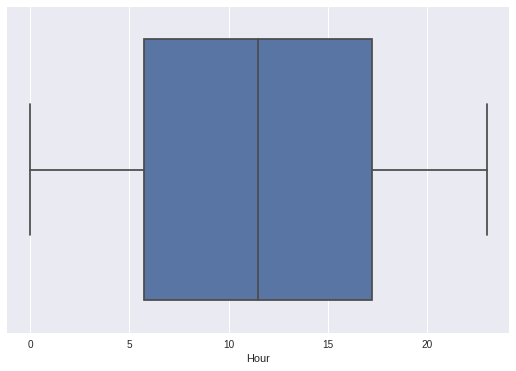

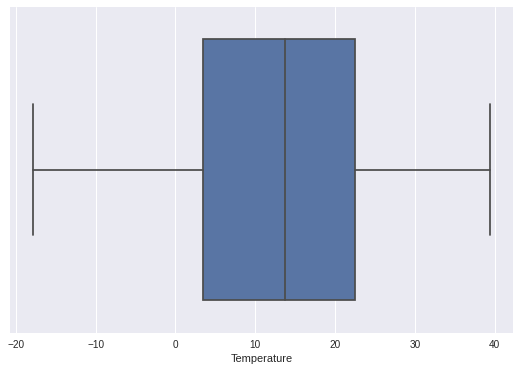

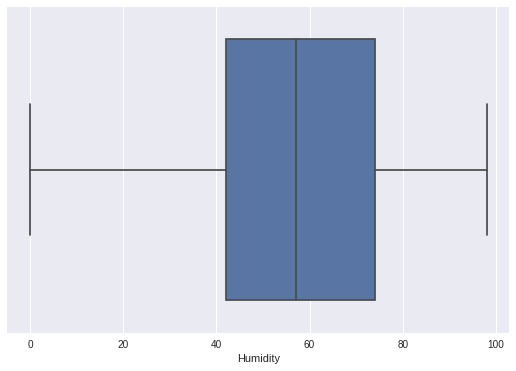

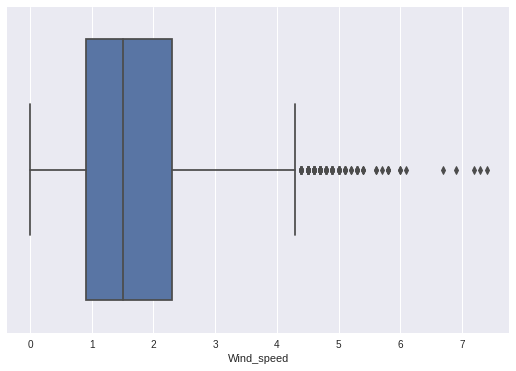

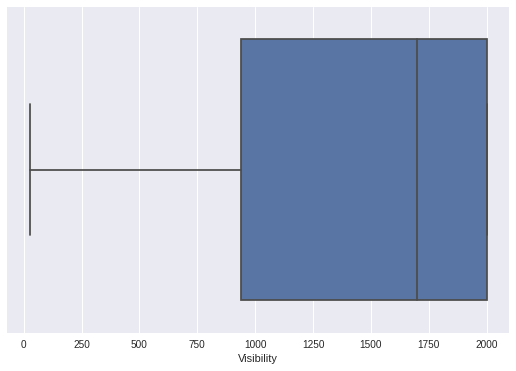

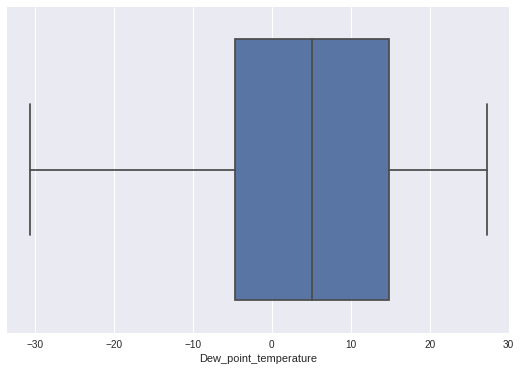

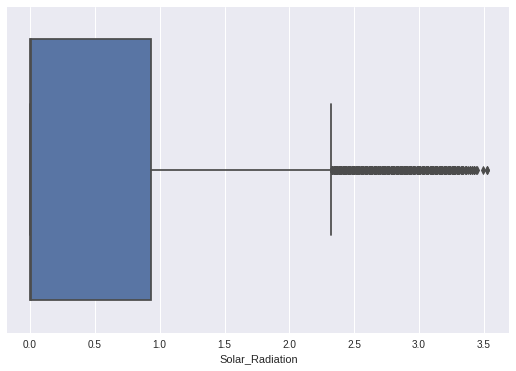

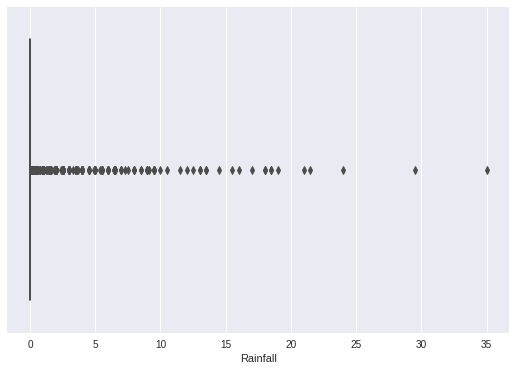

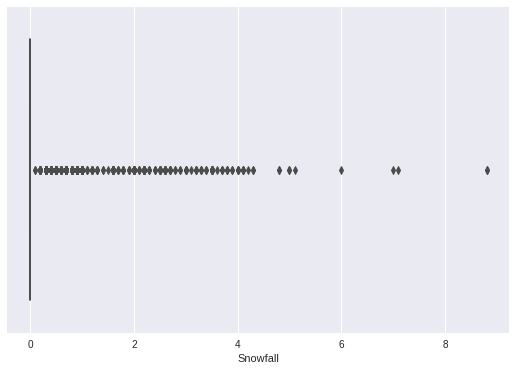

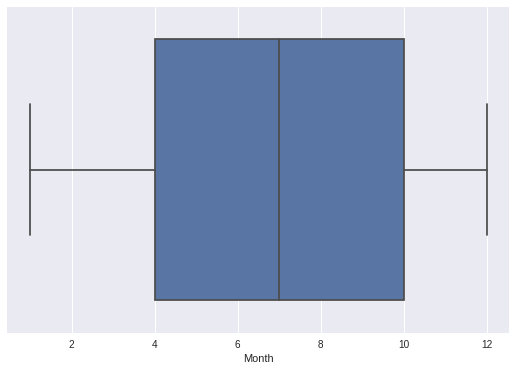

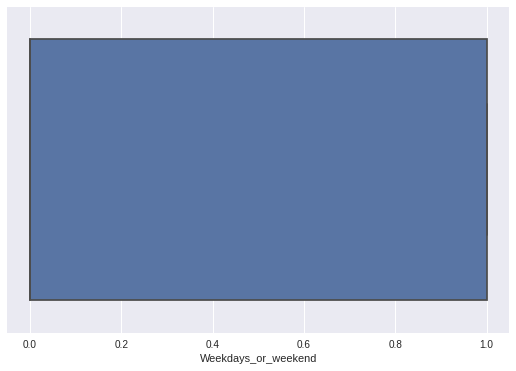

In [ ]:
# priting box plot of numeric columns to check oultliers
for col in numeric_col:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    sns.boxplot(x=bike_df[col])

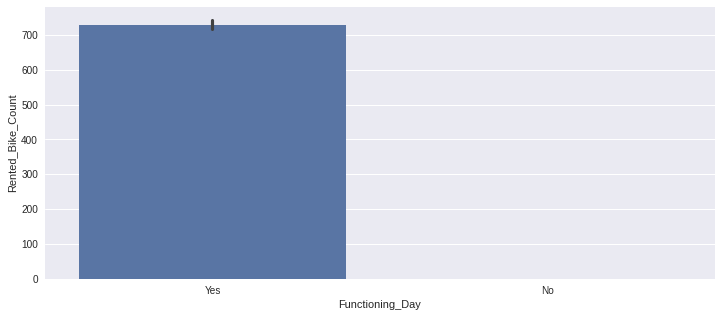

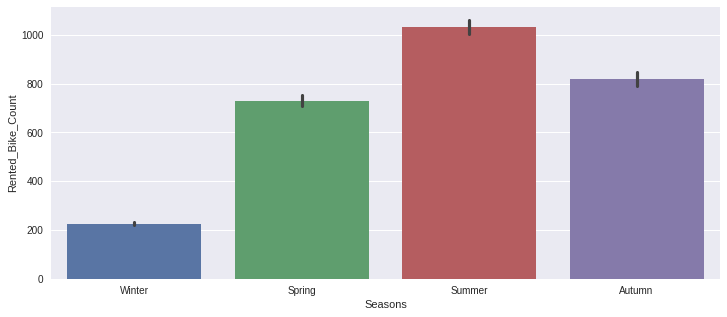

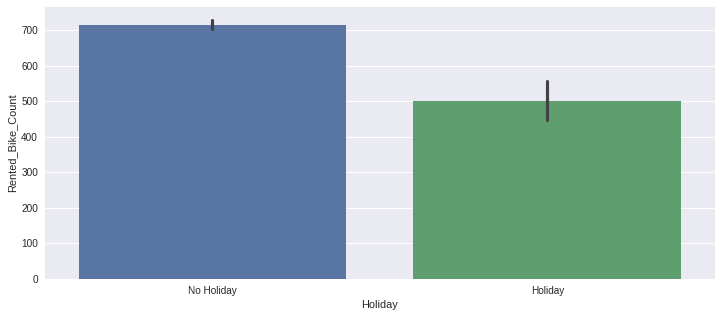

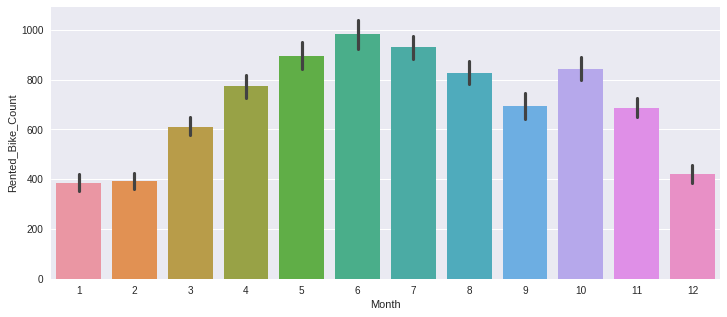

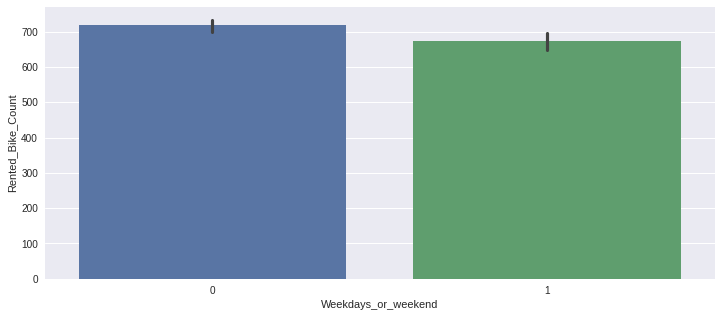

In [ ]:

# adding two  more categorical columns 
categorical_columns.extend(['Month','Weekdays_or_weekend'])

# plot barchart plot for each categorical columns with respect to target variable to get insights
for col in categorical_columns:
    fig = plt.figure(figsize=(12, 5))
    ax = fig.gca()
    sns.barplot(x=bike_df[col],y=bike_df['Rented_Bike_Count'])

**bold text**

# observations from above plotted graphs

1) Summer season had the higest Bike Rent Count. People are more likely to rent bikes in summer. Bike rentals in winter is very less compared to other seasons.
2) High number of bikes were rented on No Holidays.
3) On no functioning day no bikes were rented. we have only 295 counts of "NO". Thus we can drop that 295 values but column having only "Yes' will not add value to our column.So these columns is not use full for us. We will drop those in next steps.
4) Most of the bikes were rented on Weekdays compared to weekends.
5) From March Bike Rent Count started increasing and it was highest in June.


> Indented block



Text(0.5, 1.0, 'Bike Rental Trend according to Hour on Holiday / No Holiday')

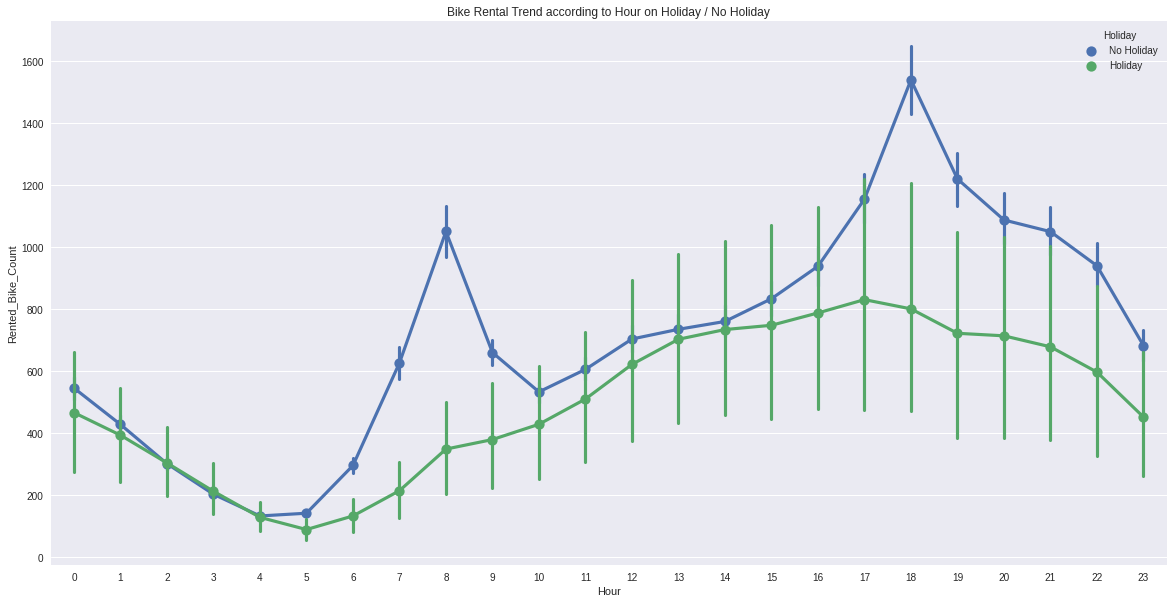

In [ ]:

# Bike Rental trend with respect to Hour on Holiday or No Holiday.
plt.figure(figsize=(20,10))
sns.pointplot(x=bike_df['Hour'],y=bike_df['Rented_Bike_Count'],hue=bike_df['Holiday'])
plt.title("Bike Rental Trend according to Hour on Holiday / No Holiday")

observation

1. There is a peak in the graph from 6 A.M to 10 A.M  . it could be because of school ,college or office timings.
2. There is a peak again in the graph from 5 P.M to 7 P.M this could be due to office, schools and colleges closing time.


Text(0.5, 1.0, 'Bike Rental Trend according to Hour on Functioning day')

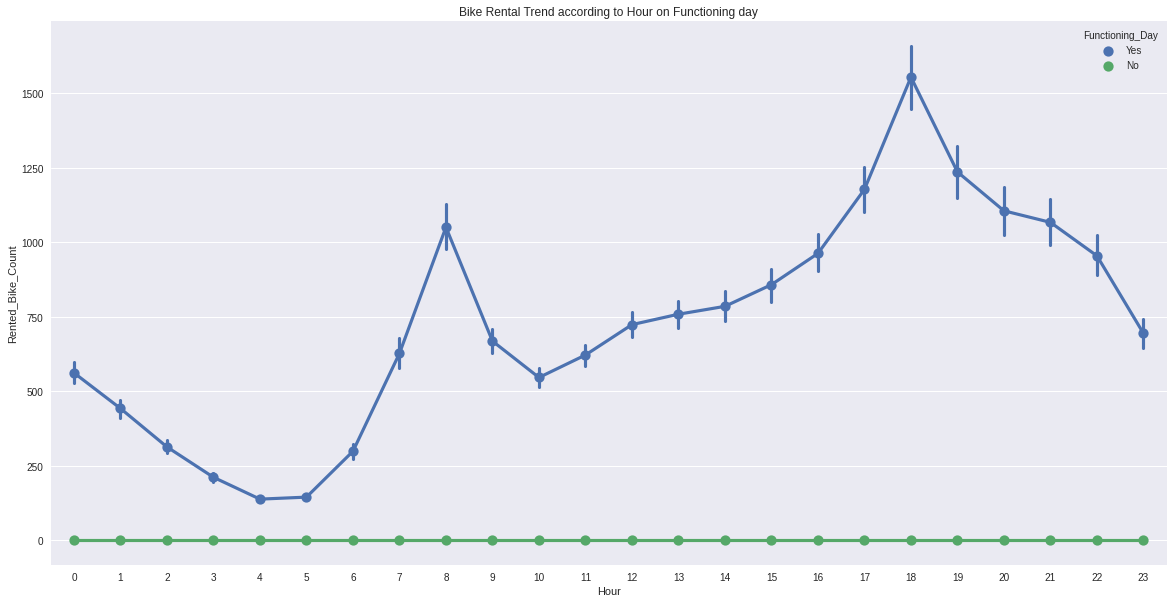

In [ ]:

## Bike Rental trend with respect to Hour on Functioning day.
plt.figure(figsize=(20,10))
sns.pointplot(x=bike_df['Hour'],y=bike_df['Rented_Bike_Count'],hue=bike_df['Functioning_Day'])
plt.title("Bike Rental Trend according to Hour on Functioning day")
     

observation

1. The trend is same as bike rental on non-holidays. 

Text(0.5, 1.0, 'Bike Rental Trend according to Hour in Seasons')

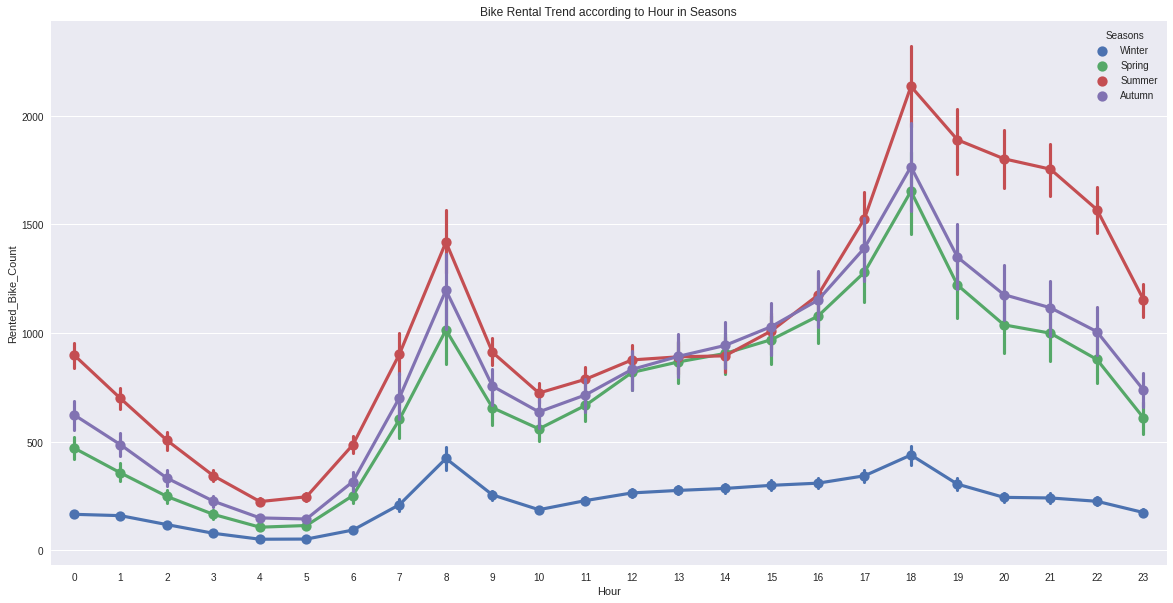

In [ ]:
## Bike Rent Count trend with respect Hours on Seasons.
plt.figure(figsize=(20,10))
sns.pointplot(x=bike_df['Hour'],y=bike_df['Rented_Bike_Count'],hue=bike_df['Seasons'])
plt.title("Bike Rental Trend according to Hour in Seasons")

Text(0.5, 1.0, 'Bike Rental Trend according to Hour in Weekdays_or_weekend.')

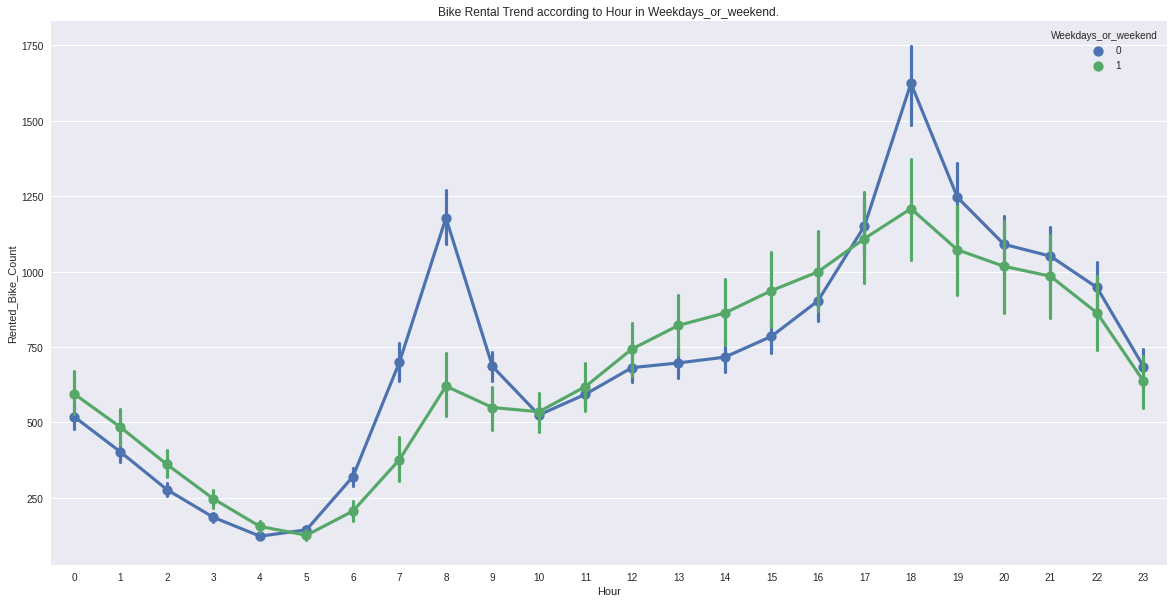

In [ ]:
## Bike Rent Count trend with respect Hours on Weekdays or weekends
plt.figure(figsize=(20,10))
sns.pointplot(x=bike_df['Hour'],y=bike_df['Rented_Bike_Count'],hue=bike_df['Weekdays_or_weekend'])
plt.title("Bike Rental Trend according to Hour in Weekdays_or_weekend.")
# 0= weekdays
#1= weekend


let's look at the distribution of target variable -'BIKE RENTED COUNT'

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


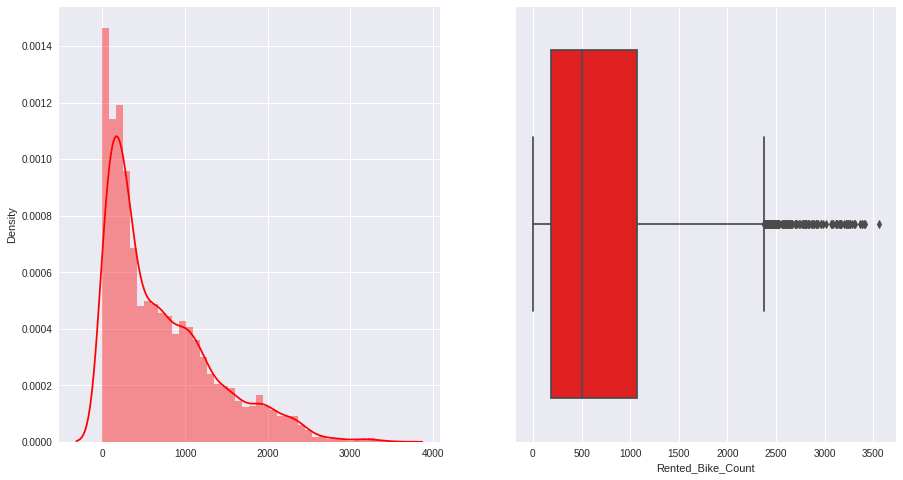

In [ ]:

# plotting subplots
f, axes = plt.subplots(1, 2,figsize=(15,8))
sns.distplot(x=bike_df['Rented_Bike_Count'],color='red',ax=axes[0])
# plt.figure(figsize=(15,8))
sns.boxplot(x=bike_df['Rented_Bike_Count'],color='red',ax=axes[1])

The target variable is slightly right skewed  so we will perform normalization by square root method.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


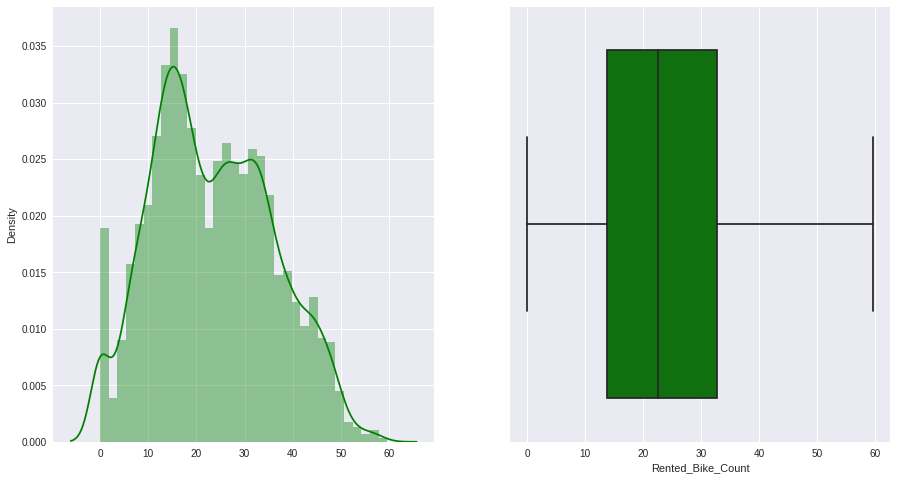

In [ ]:

f, axes = plt.subplots(1, 2,figsize=(15,8))
sns.distplot(x=np.sqrt(bike_df['Rented_Bike_Count']),color='g',ax=axes[0])
sns.boxplot(x=np.sqrt(bike_df['Rented_Bike_Count']),color='g',ax=axes[1])

Let's check the distribution of independent variable

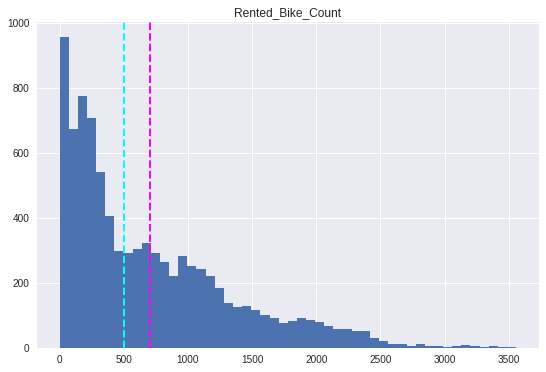

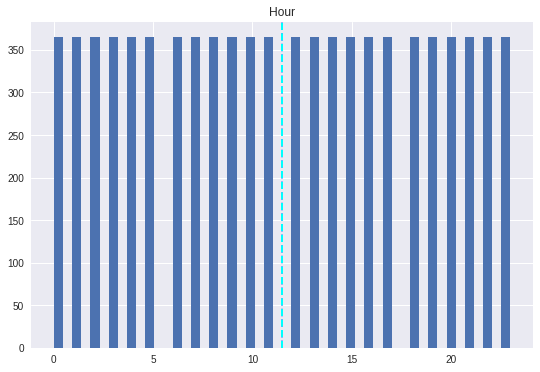

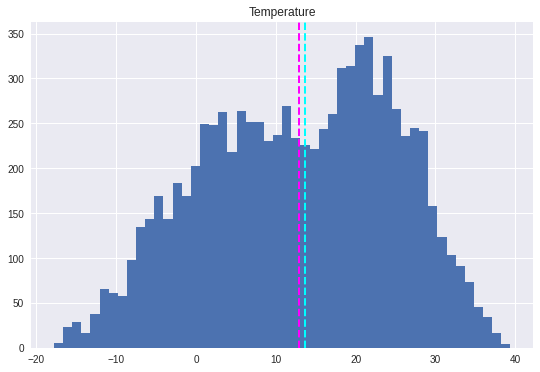

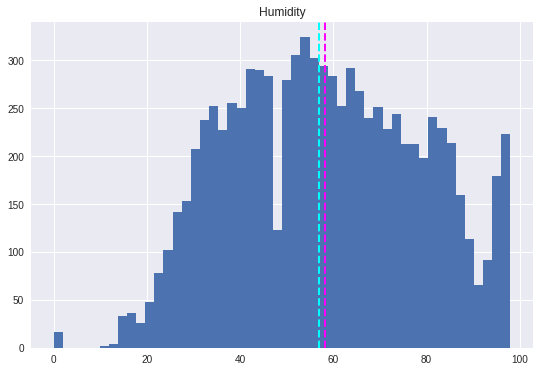

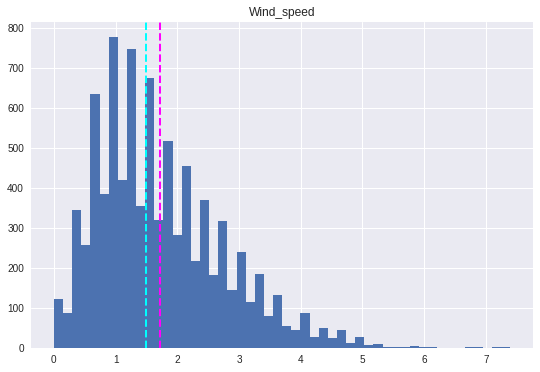

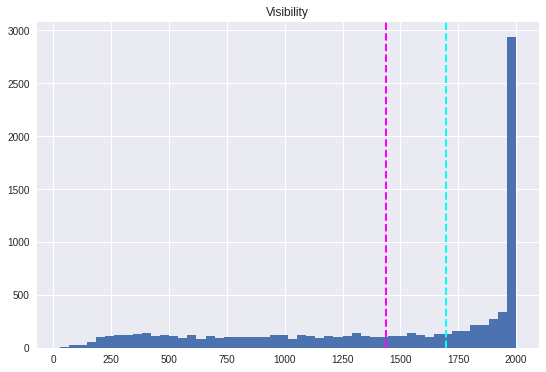

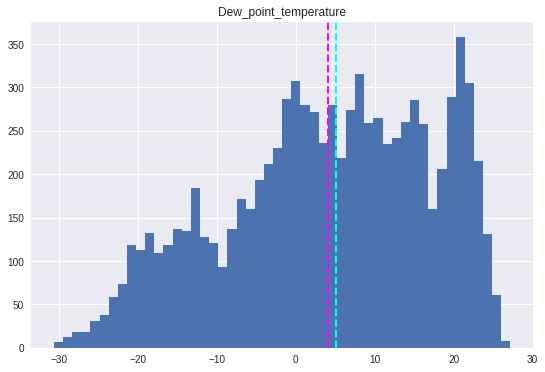

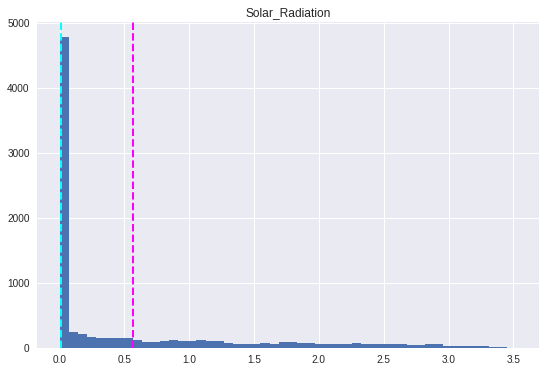

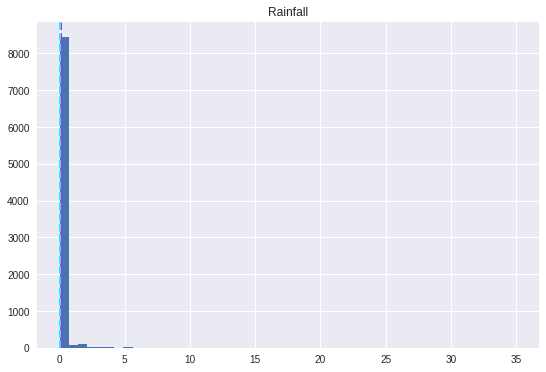

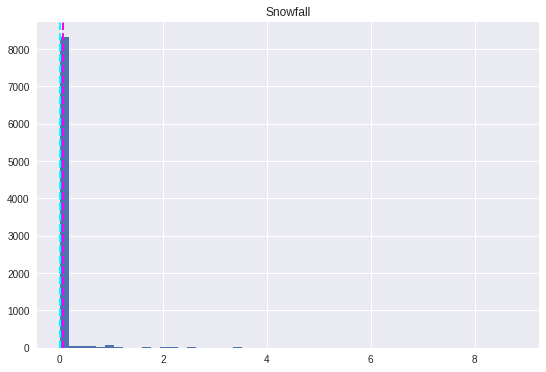

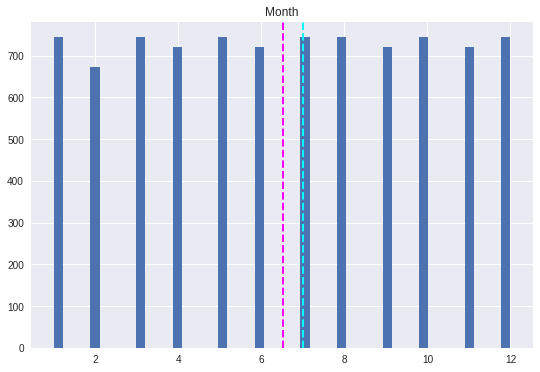

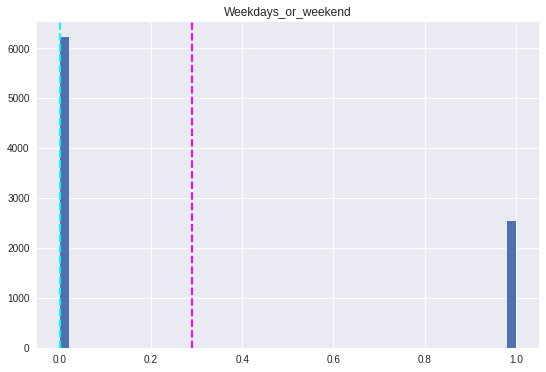

In [ ]:
for col in numeric_col:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = bike_df[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


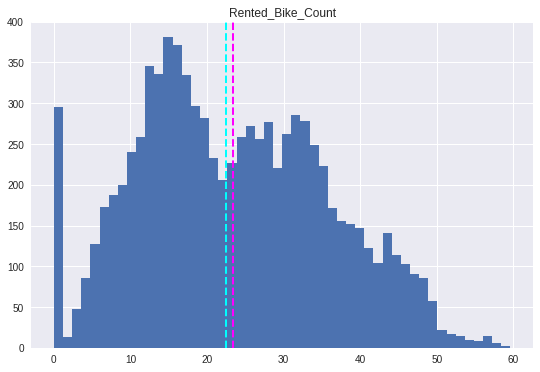

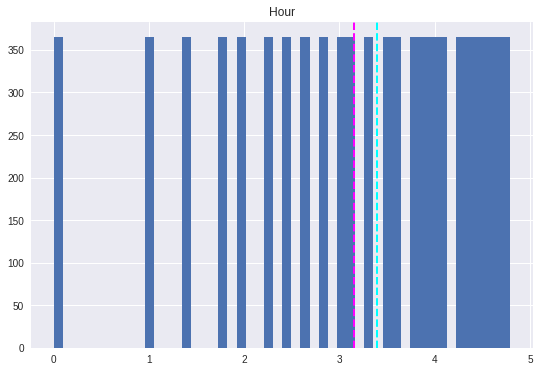

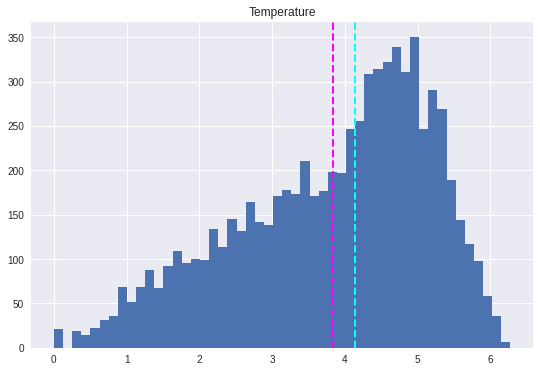

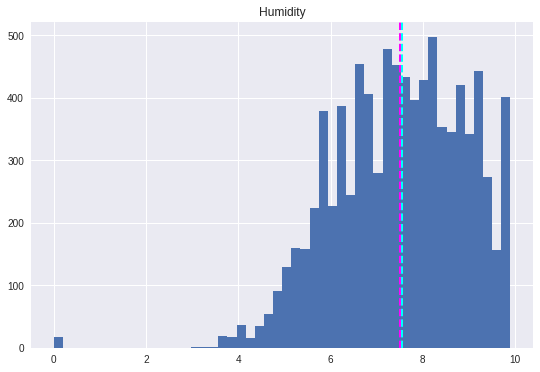

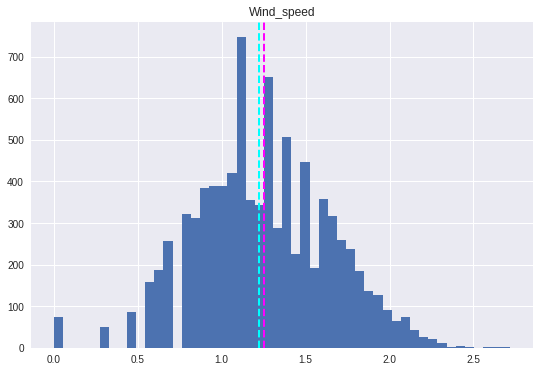

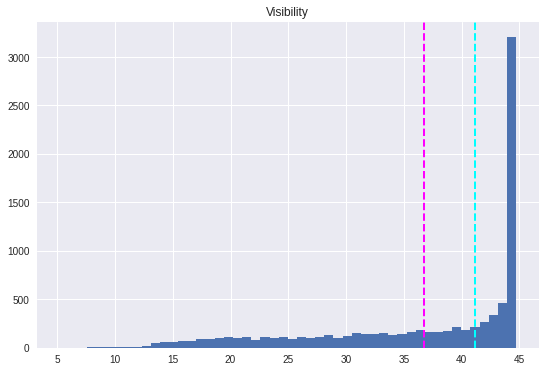

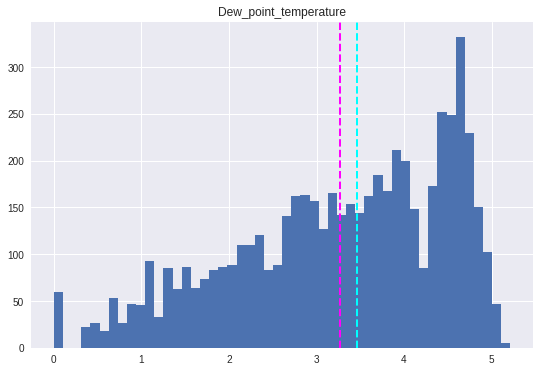

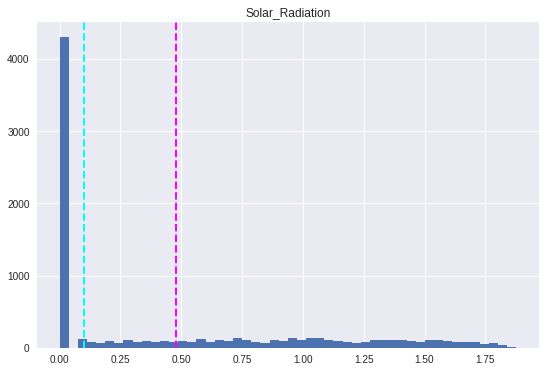

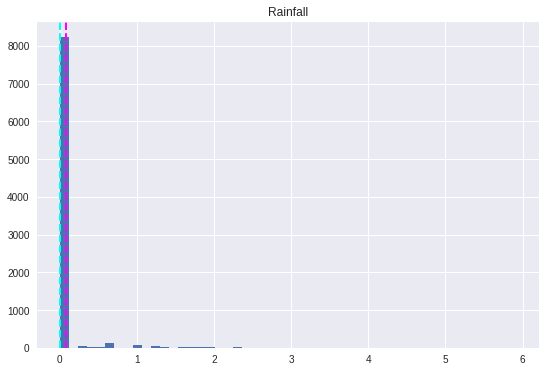

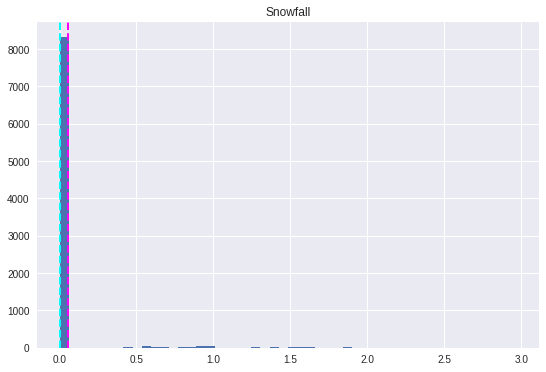

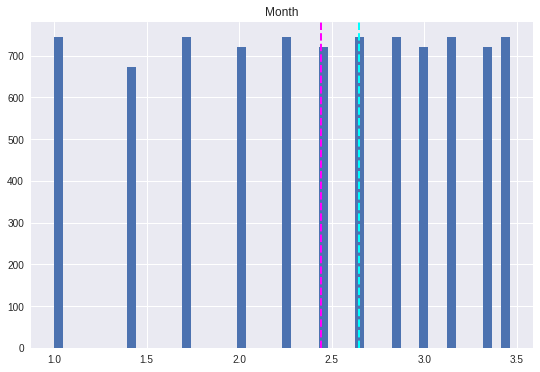

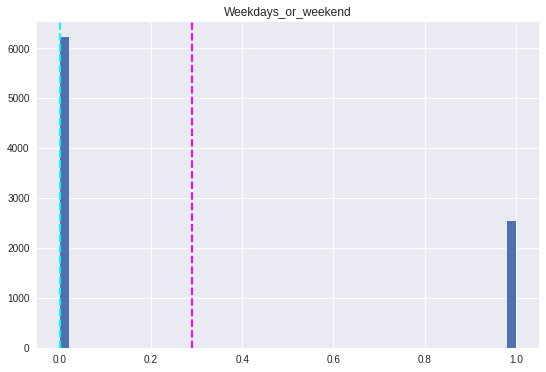

In [ ]:

# Normalizing The variables using squre root method.
for col in numeric_col:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = np.sqrt(bike_df[col])
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()
     

In [ ]:
#Relationship between dependent and independent variable 

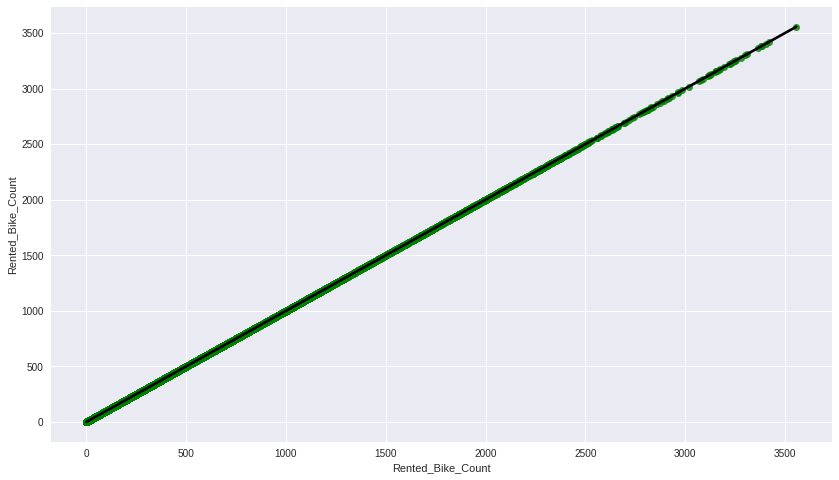

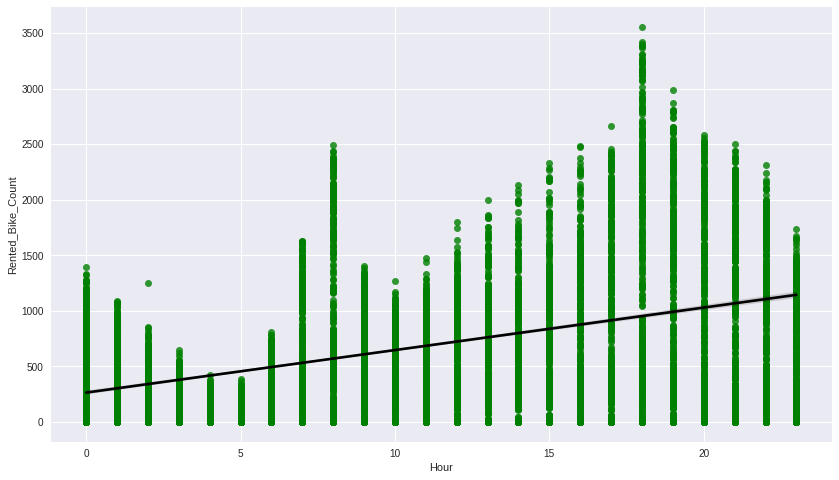

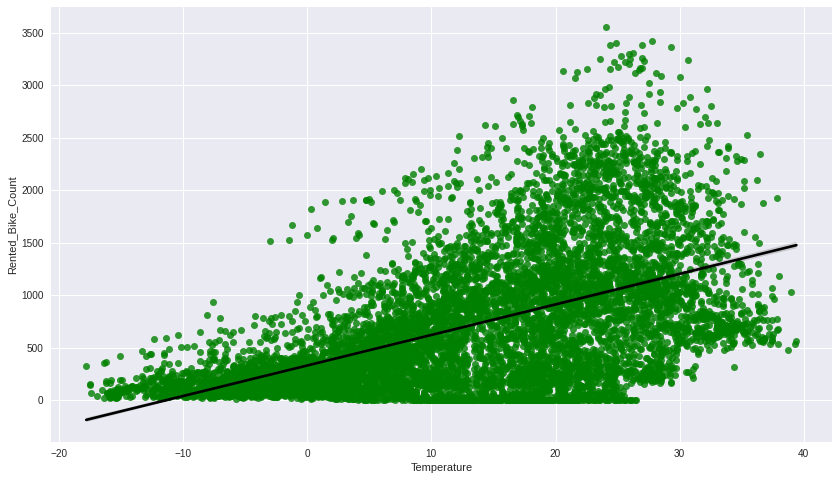

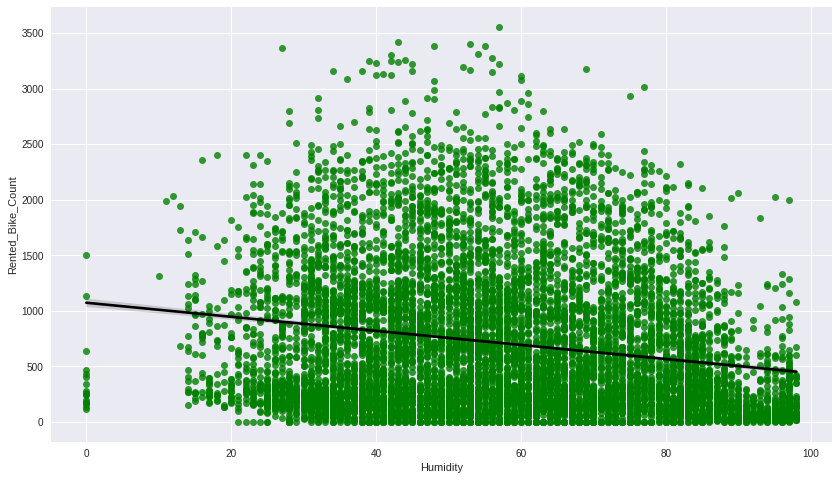

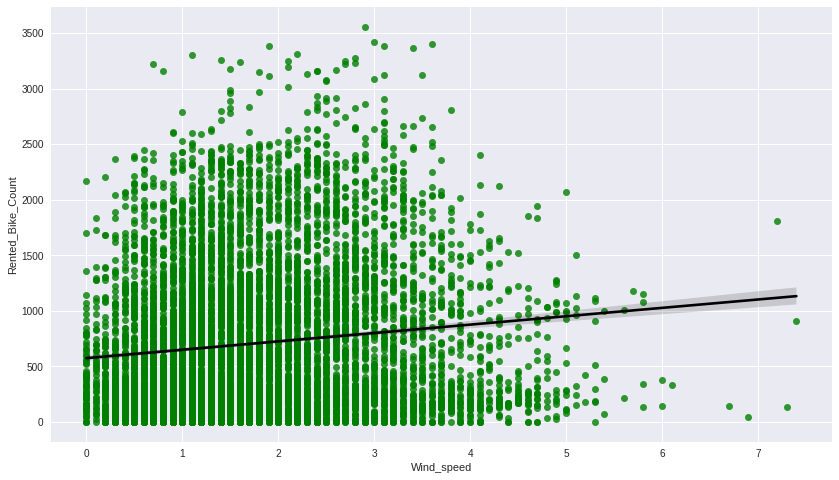

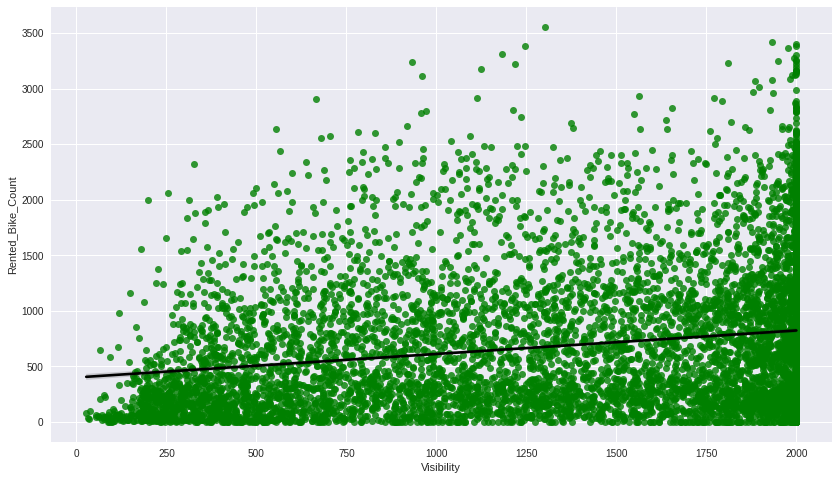

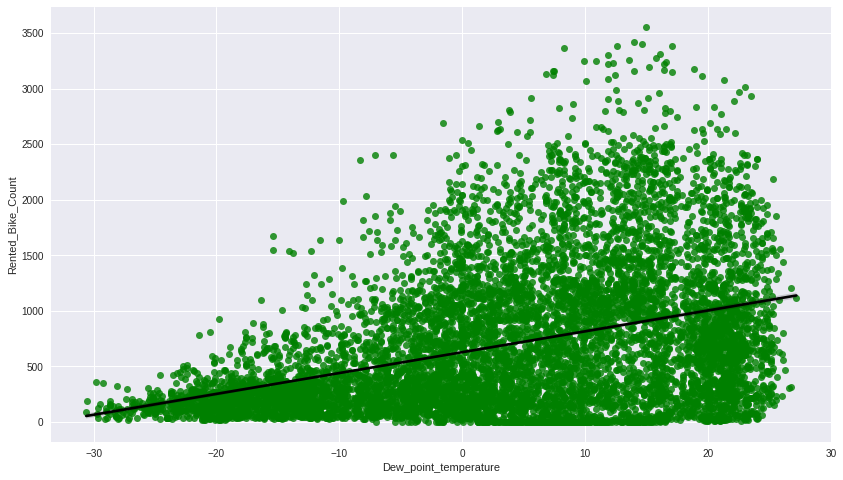

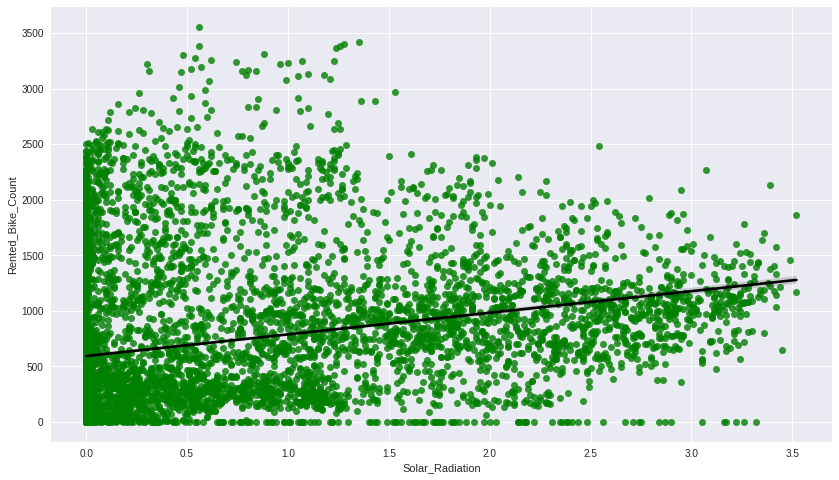

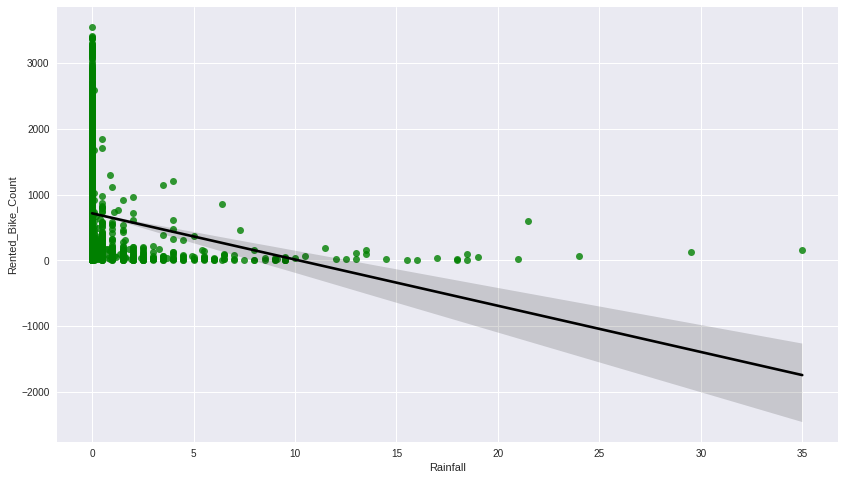

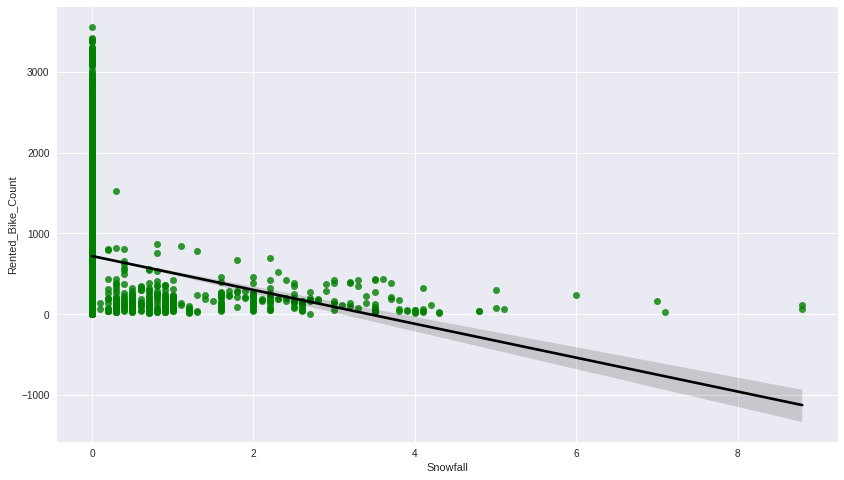

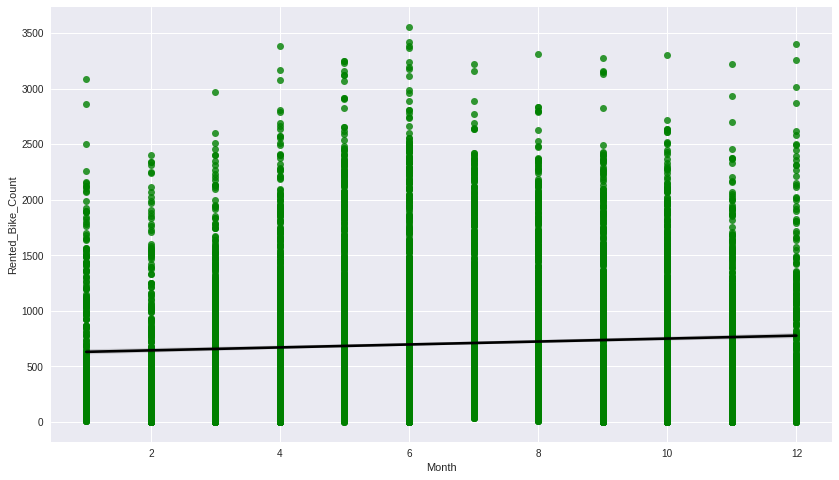

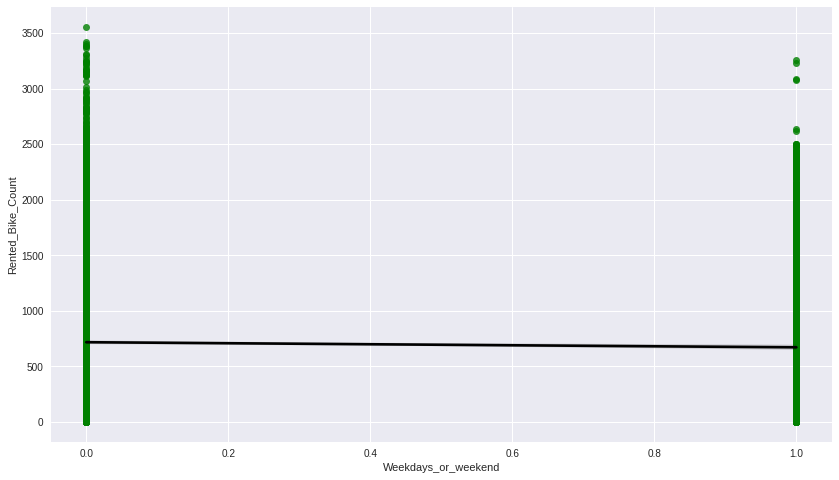

In [ ]:

for col in numeric_col:
  plt.figure(figsize=(14,8))
  ax=fig.gca()
  sns.regplot(x=bike_df[col],y=bike_df['Rented_Bike_Count'],scatter_kws={'color':'green'},line_kws={'color':'black'})

HOUR

THERE IS PEAK IN BIKE RENT 6/7 A.M TO 10 A.M IN THE MORNING AND FROM 5 P.M TO 7 P.M IN THE EVENING BECAUSE THESE ARE OFFICE,SCHOOL,COLLEGE HOURS.

**TEMPERATURE**

THE BIKE RENT COUNT IS VERY LOW WHEN THE TEMPERATURE IS BELOW 0 DEGREE CELSIUS AND VERY HIGH WHEN TEMPERATURE IS ABOVE 0 DEGREE CELSIUS.

**HUMIDTY**

HUMIDITY SEEMS TO BE INVERSELY PROPORTIONAL TO BIKE COUNT BECAUSE AS HUMIDITY INCREASES THE COUNT OF BIKE RENTED DECREASES AND WHEN THE HUMIDITY DECREASES THE COUNT OF BIKE RENTED INCREASEES.

**WIND SPEED**

WHEN WIND IS MAXIMUM UPTO 4m/s there is good no. of bikes rented.

**VISIBILITY**

IT'S VERY OBVIOUS THAT NOBODY WANTS TO RIDE IN LOW VISIBILITY, SO NUMBER OF BIKES RENTED IS COMPARATIVELY LESS.


**DEW POINT TEMPERATURE**

IT'S AGAIN THE SAME CASE AS OF TEMPERATURE. AS DEW TEMPERATURE GOES BELOW O DEGREE CELSIUS THERE IS LESS BIKE RENT COUNT. IT LOOKS LIKE DEW POINT TEMPERATURE AND TEMPERATURE COLUMNS HAVE STRONG COLINARUTY.

**SOLAR RADIATION**

THE NUMBER OF RENTED BIKE IS HUGE WHEN THERE IS SOLAR RADIATION.

**RAINFALL AND SNOWFALL**

IT'S VERY OBVIOUS THAT PEOPLE USUALLY DO NOT LIKE RIDING BIKE IN RAIN AND SNOWFALL.

**** *CHECKING CORRELATION BETWEEN DEPENDENT AND INDEPENDENT VARIABLE*

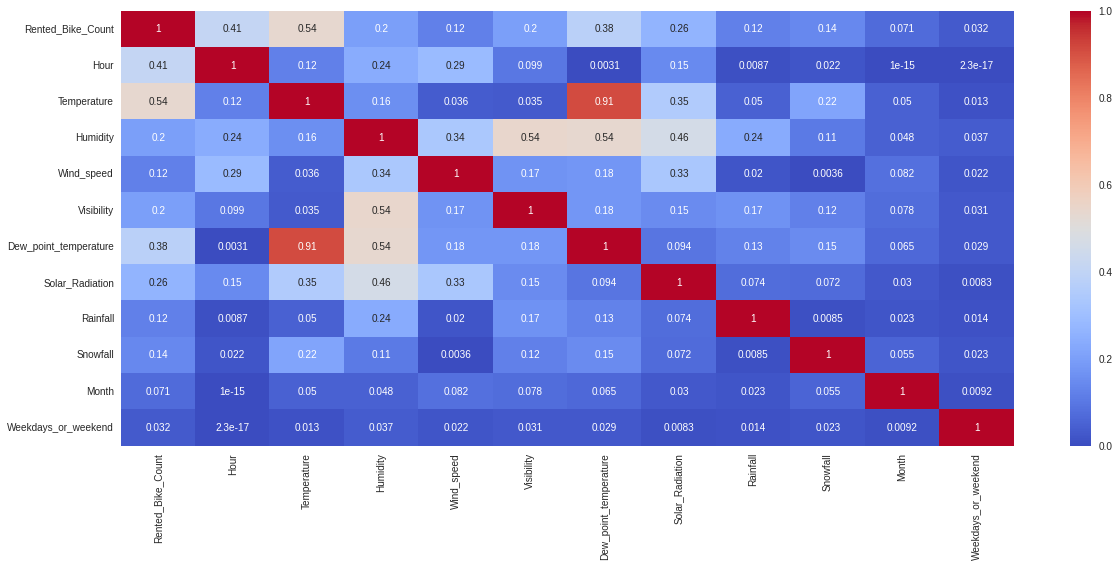

In [ ]:
plt.figure(figsize=(20,8))
corr=bike_df.corr()
sns.heatmap(data=abs(corr),annot=True,cmap='coolwarm')
     

Temperature and Dew point Temperature are highly correlated.

As per our regression assumption, there should not be colinearity between independent variables.

We can see from the heatmap that "Temperature" and "Dew Point Temperature" are highly corelated. We can drop one of them.As the corelation between temperature and our dependent variable "Bike Rented Count" is high. So we will Keep the Temperature column and drop the "Dew Point Temperature" column.

And also we dropping "Date" column as its not useful for us(as we have created the month, weekdays and weekend columns.

In [ ]:
# make copy of dataset

df=bike_df.copy()

In [ ]:

# Since Temperature and Dew point temperature are corelated with each other. We will drop dew point temperature.
df.drop('Dew_point_temperature',inplace=True,axis=1)

In [ ]:

#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def Calculate_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
Calculate_vif(df[[i for i in df.describe().columns if i not in ['Rented_Bike_Count']]])

variables       VIF
0                 Hour  3.961874
1          Temperature  3.236809
2             Humidity  6.114153
3           Wind_speed  4.616621
4           Visibility  5.404128
5      Solar_Radiation  2.272068
6             Rainfall  1.081252
7             Snowfall  1.125304
8                Month  4.580307
9  Weekdays_or_weekend  1.399708

humidity vif is greater than 5 so we will remove that column.

In [ ]:
Calculate_vif(df[[i for i in df.describe().columns if i not in ['Rented_Bike_Count','Humidity']]])

variables       VIF
0                 Hour  3.931193
1          Temperature  2.543847
2           Wind_speed  4.301342
3           Visibility  5.330632
4      Solar_Radiation  1.894468
5             Rainfall  1.045135
6             Snowfall  1.081123
7                Month  3.741610
8  Weekdays_or_weekend  1.375146

humidity vif is greater than 5 so we will remove that column.

In [ ]:
Calculate_vif(df[[i for i in df.describe().columns if i not in ['Rented_Bike_Count','Humidity','Visibility']]])

variables       VIF
0                 Hour  3.755736
1          Temperature  2.492225
2           Wind_speed  3.748534
3      Solar_Radiation  1.893823
4             Rainfall  1.030569
5             Snowfall  1.077566
6                Month  3.049391
7  Weekdays_or_weekend  1.350943

Now we have VIF values in the range of 1 to 5. we will drop 'Humidity','Visibility' this columns from our dataset

In [ ]:

# As per above vif calculation dropping humidity and visibility columns.
df.drop(['Humidity','Visibility'],inplace=True,axis=1)

In [ ]:

# checking categoiries in season column.
df['Seasons'].value_counts()

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

In [ ]:
# Createing dummy variables
df=pd.get_dummies(df,columns=['Seasons'],prefix='Seasons',drop_first=True)


In [ ]:

# checking categoiries in holiday columns.
df['Holiday'].value_counts()

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

In [ ]:
# Labeling for holiday=1 and no holiday=0
df['Holiday']=df['Holiday'].map({'No Holiday':0, 'Holiday':1})
     

In [ ]:
# # Labeling for Yes=1 and no No=0
df['Functioning_Day']=df['Functioning_Day'].map({'Yes':1, 'No':0})

In [ ]:
# checking dummy and labled columns
df.head(3)


Rented_Bike_Count  Hour  Temperature  Wind_speed  Solar_Radiation  \
0                254     0         -5.2         2.2              0.0   
1                204     1         -5.5         0.8              0.0   
2                173     2         -6.0         1.0              0.0   

   Rainfall  Snowfall  Holiday  Functioning_Day  Month  Weekdays_or_weekend  \
0       0.0       0.0        0                1      1                    0   
1       0.0       0.0        0                1      1                    0   
2       0.0       0.0        0                1      1                    0   

   Seasons_Spring  Seasons_Summer  Seasons_Winter  
0               0               0               1  
1               0               0               1  
2               0               0               1

# LINEAR REGRESSION

In [ ]:
# lets import train test split for splitting the data
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error

In [ ]:
# Define X-variable(Independent Variables) and Y-Variable(Dependent Variable)
X=df.drop('Rented_Bike_Count',axis=1)
y=np.sqrt(df['Rented_Bike_Count'])
     


In [ ]:
# Split data into train test.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)



In [ ]:
# Transforming data 
# Here if you don't apply scaling still we will get almost similar results.
# for its a good practice to apply scaling to the linear regression models.
min_max_scaler = MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.transform(X_test)


In [ ]:
# Checking shape
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(6132, 13)
(6132,)
(2628, 13)
(2628,)


In [ ]:
# Checking shape
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(6132, 13)
(6132,)
(2628, 13)
(2628,)


In [ ]:
# Taking instance
l_reg=LinearRegression()
# fitting the model and trainig
l_reg.fit(X_train,y_train)
     


LinearRegression()

In [ ]:
LinearRegression()

LinearRegression()

In [ ]:

# Cheeck coefficents
l_reg.coef_
     

array([ 13.03412526,  24.3956317 ,   3.35825273,   3.43510298,
       -71.13971093, -10.4763411 ,  -3.00551186,  28.47981875,
         1.05521935,  -0.58930031,  -2.93262797,  -3.58223659,
        -6.45886182])

In [ ]:
# get dataframe for x columns and coefficient
pd.DataFrame(l_reg.coef_,X.columns, columns=['Coefficient'])
     

Coefficient
Hour                   13.034125
Temperature            24.395632
Wind_speed              3.358253
Solar_Radiation         3.435103
Rainfall              -71.139711
Snowfall              -10.476341
Holiday                -3.005512
Functioning_Day        28.479819
Month                   1.055219
Weekdays_or_weekend    -0.589300
Seasons_Spring         -2.932628
Seasons_Summer         -3.582237
Seasons_Winter         -6.458862

In [ ]:
# Check intercept
l_reg.intercept_

-21.47705344024816

In [ ]:
#Checking score
l_reg.score(X_train,y_train)


0.6123528085603556

In [ ]:

# Y peredictions on train data
y_pred_train=l_reg.predict(X_train)

# y predictions on test data
y_pred=l_reg.predict(X_test)

In [ ]:
# Evaluation of training data set

#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_train,y_pred_train)
print(f"The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_train,y_pred_train)
print(f"The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_train,y_pred_train)
print(f"The R2 Score is {R2}.")


The Mean Absolute Error (MAE) is 5.8555397241788345.
The Mean Squred Error(MSE) is 60.29949292444555.
The Root Mean Squared Error(RMSE) is 7.765274813195316.
The R2 Score is 0.6123528085603556.


In [ ]:
#Saving train data set results in dataframe.
train_dict={'Model':"Linear Regression",
             'MAE':round(MAE,4),
             'MSE':round(MSE,4),
             'RMSE':round(RMSE,4),
             'R2_score':round(R2,4)}

In [ ]:
# create training_result dataframe
traing_results_df=pd.DataFrame(train_dict,index=[1])
traing_results_df

Model     MAE      MSE    RMSE  R2_score
1  Linear Regression  5.8555  60.2995  7.7653    0.6124

# EVALUATION OF TEST DATA

In [ ]:
# Evaluation of Test data set

#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_test,y_pred)
print(f" The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_test,y_pred)
print(f" The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_test,y_pred)
print(f"The R2 Score is {R2}.")

 The Mean Absolute Error (MAE) is 5.834169822951748.
 The Mean Squred Error(MSE) is 58.624247223024895.
The Root Mean Squared Error(RMSE) is 7.656647257319936.
The R2 Score is 0.618326967365199.


In [ ]:
# saving test result in dictionary.
test_dict={'Model':"Linear Regression",
             'MAE':round(MAE,4),
             'MSE':round(MSE,4),
             'RMSE':round(RMSE,4),
             'R2_score':round(R2,4)}

In [ ]:
# create test_result dataframe
test_results_df=pd.DataFrame(test_dict,index=[1])
test_results_df

Model     MAE      MSE    RMSE  R2_score
1  Linear Regression  5.8342  58.6242  7.6566    0.6183

On testing data R2 score is 0.6183 which is almost close to training data R2 score.Hence we can say that our model performance is good and overfitting is not observed. We need to improve our model performance.



In [ ]:
# define a fucntion to plot predicted y values and actual y values
def plot_Pred_vs_actual(y_pred,y_test):
  ''' Visualize predicted values with actaul values'''
  plt.figure(figsize=(20,8))
  plt.plot(y_pred)
  plt.plot(np.array(y_test))
  plt.legend(["Predicted","Actual"],)
  plt.title("Predicted V/S Actual")
  plt.show()

In [ ]:
# define a function to plot scatter plot for y_test and y_actual.
def plot_scatter(y_pred,y_test):
  '''Plot scatter plot for y_test values and 
  y_test values. To check how close we are to regresson line'''
  plt.figure(figsize=(16,5))
  sns.regplot(x=y_test,y=y_pred,scatter_kws={'color':'magenta'},line_kws={'color':'black'})
  plt.xlabel('Actual')
  plt.ylabel("Predicted")
  plt.title("Actual v/s Predicted")

In [ ]:
# Residuals of the regression are normally distributed.(Homoscedasticity refers to whether these residuals are equally distributed).
 #Mean of residuals should be zero or close to 0 as much as possible. It is done to check whether our line is actually the line of “best fit” 
def Residual_distPlot(y_pred,y_test):  
  '''Checks the distribution of residals)'''        
                                                    
  plt.figure(figsize=(10,5))
  sns.distplot(x=y_test-y_pred)

  plt.title("Residual Distribution")

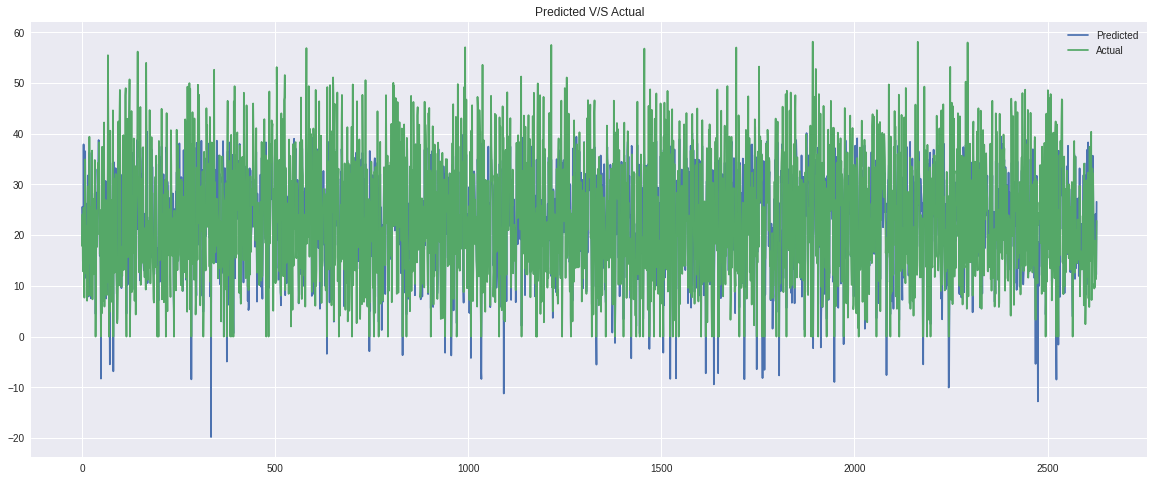

In [ ]:
plot_Pred_vs_actual(y_pred,y_test)

Text(0.5, 0, 'y_predicted')

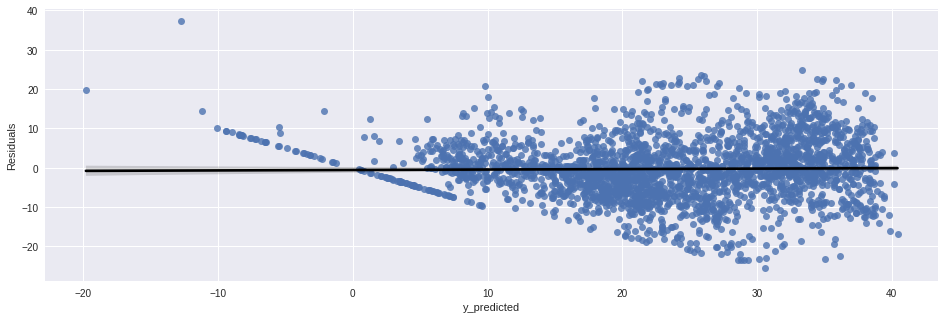

In [ ]:
# Check Homoscedasticity by plotting y_predicted values and the residuals
plt.figure(figsize=(16,5))
sns.regplot(x=y_pred,y=y_test-y_pred,line_kws={'color':'black'})
plt.ylabel('Residuals')
plt.xlabel('y_predicted')

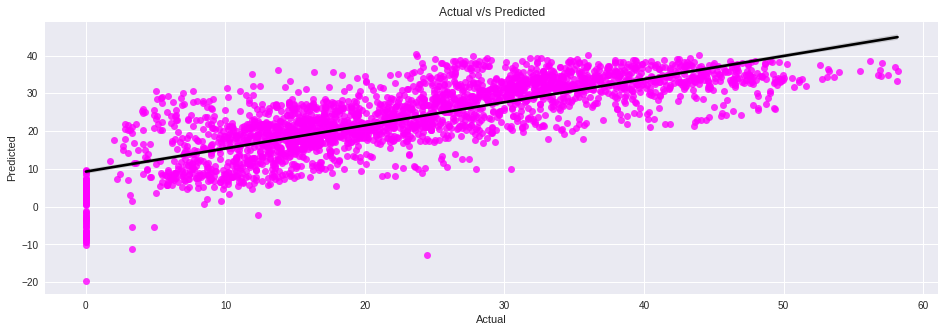

In [ ]:
# Checking how predicted values and actual values are close  to the regression line
plot_scatter(y_pred,y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


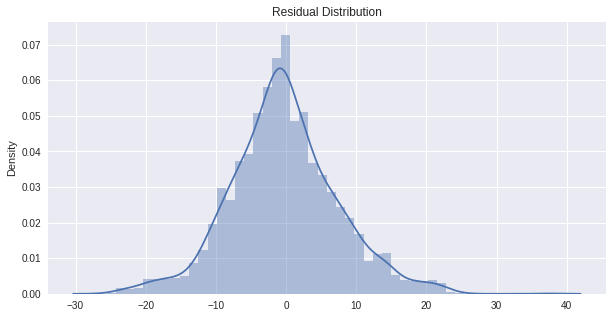

In [ ]:
Residual_distPlot(y_pred,y_test)

In [ ]:

# instantiating
lasso_reg=Lasso(alpha=0.01)

In [ ]:
# Fitting and training the model
lasso_reg.fit(X_train,y_train)

Lasso(alpha=0.01)

In [ ]:
# Check coefficient
lasso_reg.coef_

array([ 13.06618706,  23.53689635,   2.7511264 ,   3.64259929,
       -61.65707559,  -6.14969513,  -2.72395881,  27.99198566,
         0.97614536,  -0.51631491,  -2.73325777,  -3.18707888,
        -6.55141403])

In [ ]:
# get dataframe of x columns and Coeficients
pd.DataFrame(lasso_reg.coef_,X.columns,columns=['Coeficients']).reset_index().rename(columns={'index':'X'})

X  Coeficients
0                  Hour    13.066187
1           Temperature    23.536896
2            Wind_speed     2.751126
3       Solar_Radiation     3.642599
4              Rainfall   -61.657076
5              Snowfall    -6.149695
6               Holiday    -2.723959
7       Functioning_Day    27.991986
8                 Month     0.976145
9   Weekdays_or_weekend    -0.516315
10       Seasons_Spring    -2.733258
11       Seasons_Summer    -3.187079
12       Seasons_Winter    -6.551414

In [ ]:
# get dataframe of x columns and Coeficients
pd.DataFrame(lasso_reg.coef_,X.columns,columns=['Coeficients']).reset_index().rename(columns={'index':'X'})

X  Coeficients
0                  Hour    13.066187
1           Temperature    23.536896
2            Wind_speed     2.751126
3       Solar_Radiation     3.642599
4              Rainfall   -61.657076
5              Snowfall    -6.149695
6               Holiday    -2.723959
7       Functioning_Day    27.991986
8                 Month     0.976145
9   Weekdays_or_weekend    -0.516315
10       Seasons_Spring    -2.733258
11       Seasons_Summer    -3.187079
12       Seasons_Winter    -6.551414

In [ ]:
# Check score on test dataset
lasso_reg.score(X_test,y_test)

0.61723035952942

In [ ]:
# Check intercept
lasso_reg.intercept_
     

-20.65131177706763

In [ ]:
# prediction on train data
y_pred_train=lasso_reg.predict(X_train)
# y prdiction on test data
y_pred=lasso_reg.predict(X_test)

# EVALUATION OF TRAIN DATA



In [ ]:
# Evaluation of training data set

#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_train,y_pred_train)
print(f"The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_train,y_pred_train)
print(f"The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_train,y_pred_train)
print(f"The R2 Score is {R2}.")

The Mean Absolute Error (MAE) is 5.869103531726283.
The Mean Squred Error(MSE) is 60.46402436494349.
The Root Mean Squared Error(RMSE) is 7.775861647749624.
The R2 Score is 0.6112950857219155.


In [ ]:
# Create train results dictionary
train_dict={'Model':"Lasoo",
             'MAE':round(MAE,4),
             'MSE':round(MSE,4),
             'RMSE':round(RMSE,4),
             'R2_score':round(R2,4)}

In [ ]:
# appending train result to training result dataframe
traing_results_df=traing_results_df.append(train_dict,ignore_index=True)
traing_results_df


Model     MAE      MSE    RMSE  R2_score
0  Linear Regression  5.8555  60.2995  7.7653    0.6124
1              Lasoo  5.8691  60.4640  7.7759    0.6113

# EVALUATION ON TEST DATA

In [ ]:
# Evaluation of Test data set

#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_test,y_pred)
print(f" The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_test,y_pred)
print(f" The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_test,y_pred)
print(f"The R2 Score is {R2}.")

 The Mean Absolute Error (MAE) is 5.850566426263689.
 The Mean Squred Error(MSE) is 58.792684087499225.
The Root Mean Squared Error(RMSE) is 7.667638755673042.
The R2 Score is 0.61723035952942.


In [ ]:
# Create test results dictionary
test_dict={'Model':"Lasso",
             'MAE':round(MAE,4),
             'MSE':round(MSE,4),
             'RMSE':round(RMSE,4),
             'R2_score':round(R2,4)}


In [ ]:
# appending test result to test result dataframe
test_results_df=test_results_df.append(test_dict,ignore_index=True)
test_results_df
     

Model     MAE      MSE    RMSE  R2_score
0  Linear Regression  5.8342  58.6242  7.6566    0.6183
1              Lasso  5.8506  58.7927  7.6676    0.6172

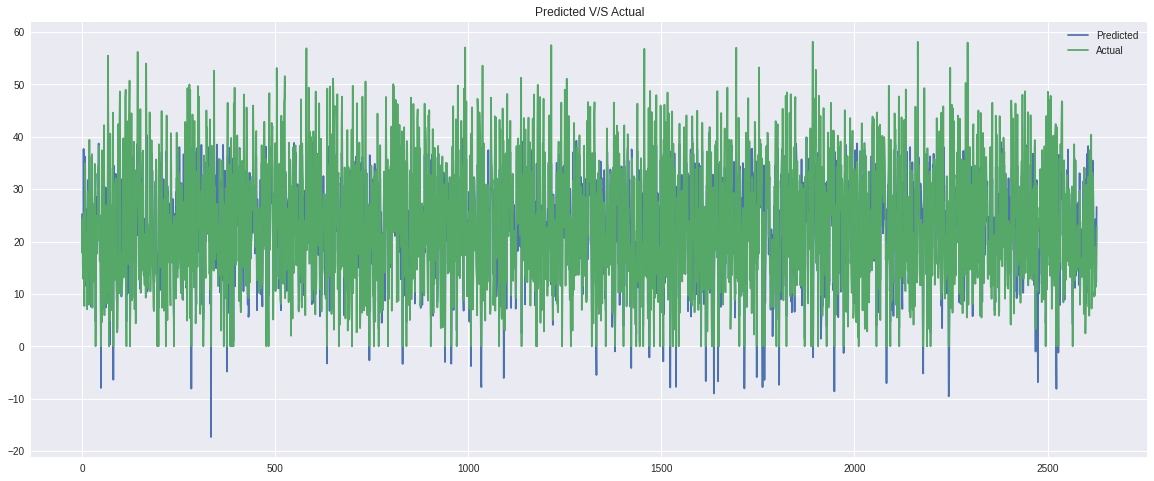

In [ ]:
plot_Pred_vs_actual(y_pred,y_test)
     

Text(0.5, 0, 'y_predicted')

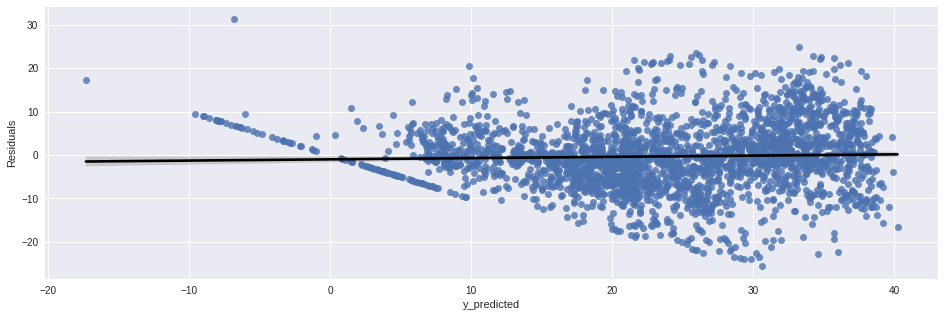

In [ ]:
# Check Homoscedasticity by plotting y_predicted values and the residuals
plt.figure(figsize=(16,5))
sns.regplot(x=y_pred,y=y_test-y_pred,line_kws={'color':'black'})
plt.ylabel('Residuals')
plt.xlabel('y_predicted')
     

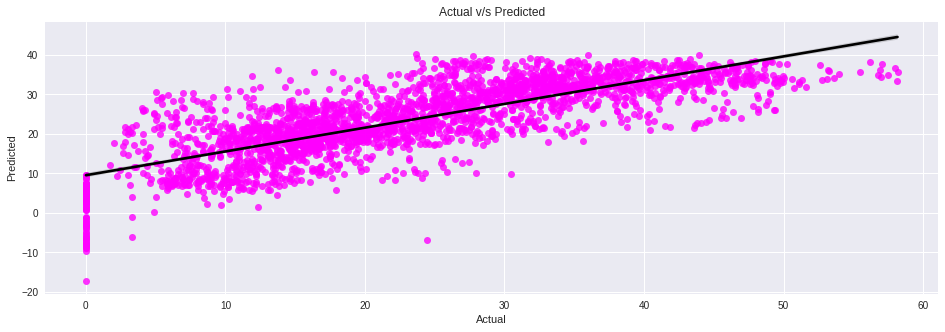

In [ ]:
# Checking how predicted values and actual values are close  to the regression line
plot_scatter(y_pred,y_test)
     

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


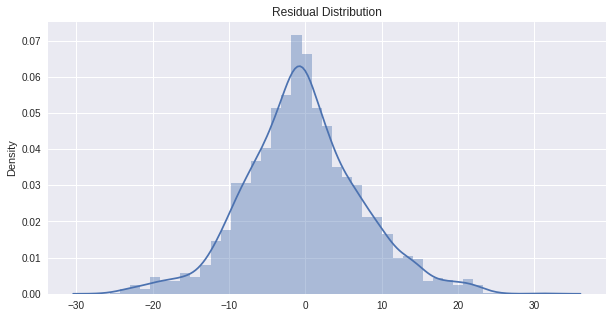

In [ ]:
# Residuals of the regression are normally distributed.(Homoscedasticity refers to whether these residuals are equally distributed)

Residual_distPlot(y_pred,y_test)
     


# RIDGE

In [ ]:
# instantiating
ridge_lg=Ridge(alpha=0.1)
# fitting and training
ridge_lg.fit(X_train,y_train)

Ridge(alpha=0.1)

In [ ]:
# check coefficient
ridge_lg.coef_

array([ 13.03371786,  24.34582856,   3.34949793,   3.4576116 ,
       -70.04499364, -10.41205151,  -3.00303898,  28.46135581,
         1.05691503,  -0.58736967,  -2.9327985 ,  -3.57190574,
        -6.46665547])

In [ ]:
# get dataframe for x columns and coeff
pd.DataFrame(ridge_lg.coef_,X.columns,columns=['Coefficients'])
     

Coefficients
Hour                    13.033718
Temperature             24.345829
Wind_speed               3.349498
Solar_Radiation          3.457612
Rainfall               -70.044994
Snowfall               -10.412052
Holiday                 -3.003039
Functioning_Day         28.461356
Month                    1.056915
Weekdays_or_weekend     -0.587370
Seasons_Spring          -2.932799
Seasons_Summer          -3.571906
Seasons_Winter          -6.466655

In [ ]:
# Check intercept
ridge_lg.intercept_

-21.44118629409719

In [ ]:
# y predictions on training dataset
y_pred_train_ridge=ridge_lg.predict(X_train)
# y predictions on test dataset
y_pred_ridge=ridge_lg.predict(X_test)
     

# EVALUATION ON TRAIN DATA



In [ ]:
# Evaluation of training data set

#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_train,y_pred_train)
print(f"The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_train,y_pred_train)
print(f"The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_train,y_pred_train)
print(f"The R2 Score is {R2}.")

The Mean Absolute Error (MAE) is 5.869103531726283.
The Mean Squred Error(MSE) is 60.46402436494349.
The Root Mean Squared Error(RMSE) is 7.775861647749624.
The R2 Score is 0.6112950857219155.


In [ ]:
train_dict={'Model':"Ridge GridSearchCV",
             'MAE':round(MAE,4),
             'MSE':round(MSE,4),
             'RMSE':round(RMSE,4),
             'R2_score':round(R2,4)}



In [ ]:

traing_results_df=traing_results_df.append(train_dict,ignore_index=True)
traing_results_df

Model     MAE      MSE    RMSE  R2_score
0   Linear Regression  5.8555  60.2995  7.7653    0.6124
1               Lasoo  5.8691  60.4640  7.7759    0.6113
2  Ridge GridSearchCV  5.8691  60.4640  7.7759    0.6113

# EVALUATION ON TEST DATA

In [ ]:
# Evaluation of Test data set

#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_test,y_pred)
print(f" The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_test,y_pred)
print(f" The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_test,y_pred)
print(f"The R2 Score is {R2}.")

 The Mean Absolute Error (MAE) is 5.850566426263689.
 The Mean Squred Error(MSE) is 58.792684087499225.
The Root Mean Squared Error(RMSE) is 7.667638755673042.
The R2 Score is 0.61723035952942.


In [ ]:
test_dict={'Model':"Ridge(GridsearchCv Tunned)",
             'MAE':round(MAE,4),
             'MSE':round(MSE,4),
             'RMSE':round(RMSE,4),
             'R2_score':round(R2,4)}

In [ ]:
test_results_df=test_results_df.append(test_dict,ignore_index=True)
test_results_df

Model     MAE      MSE    RMSE  R2_score
0           Linear Regression  5.8342  58.6242  7.6566    0.6183
1                       Lasso  5.8506  58.7927  7.6676    0.6172
2  Ridge(GridsearchCv Tunned)  5.8506  58.7927  7.6676    0.6172

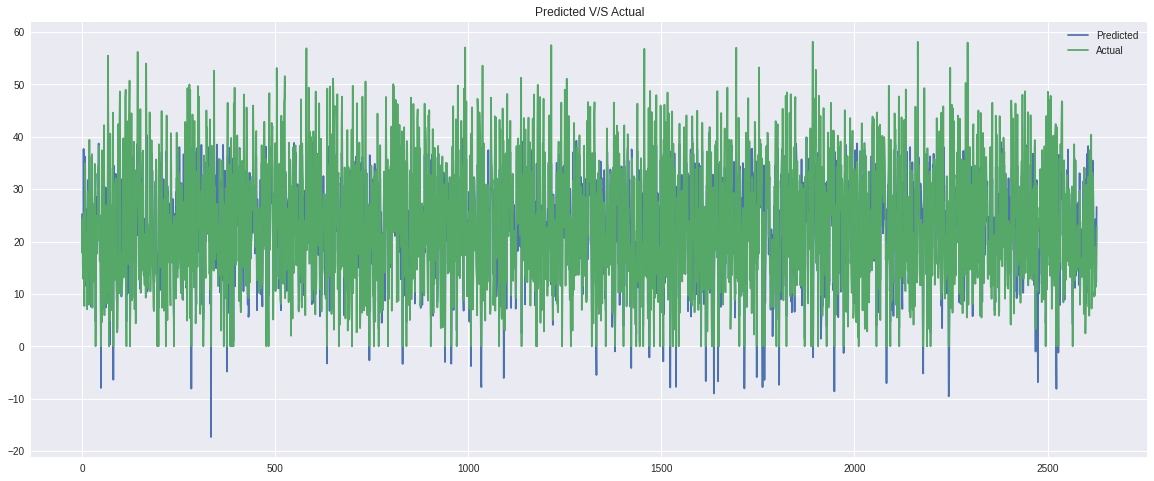

In [ ]:
plot_Pred_vs_actual(y_pred,y_test)

Text(0.5, 0, 'y_predicted')

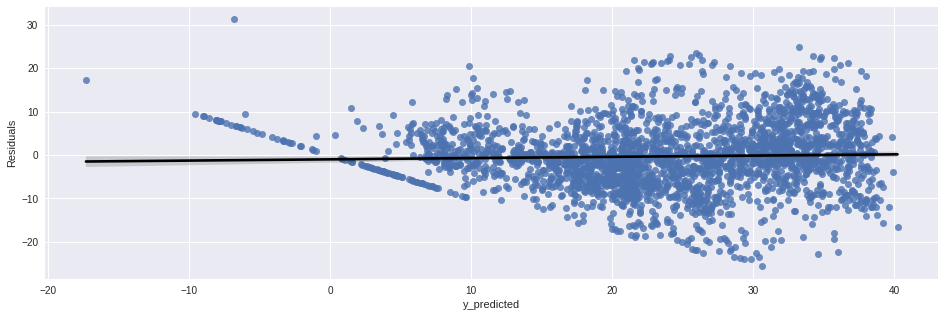

In [ ]:
# Check Homoscedasticity by plotting y_predicted values and the residuals
plt.figure(figsize=(16,5))
sns.regplot(x=y_pred,y=y_test-y_pred,line_kws={'color':'black'})
plt.ylabel('Residuals')
plt.xlabel('y_predicted')

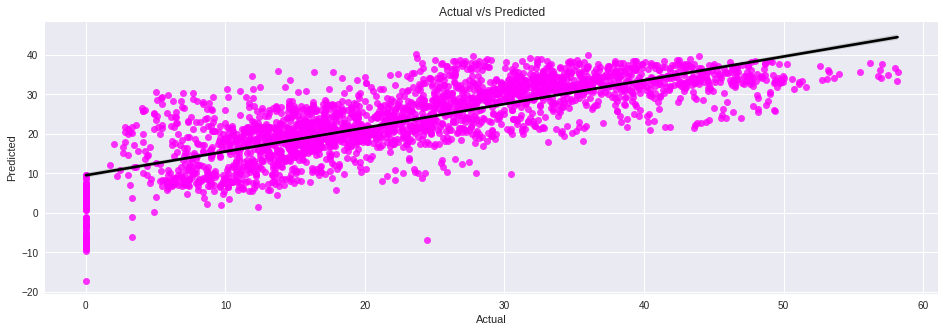

In [ ]:
# Checking how predicted values and actual values are close  to the regression line
plot_scatter(y_pred,y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


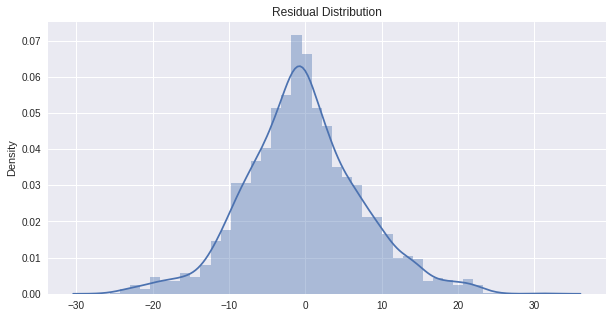

In [ ]:
# Residuals of the regression are normally distributed.(Homoscedasticity refers to whether these residuals are equally distributed)
Residual_distPlot(y_pred,y_test)

In [ ]:
# importing gridsearchcv for hyper parameter tuning
from sklearn.model_selection  import GridSearchCV

# GreadSearchCV on RIDGE

In [ ]:
# cross validation on Ridge regression
# creating object
ridge_reg=Ridge()

# alphas values's dictionary to pass on in Gridsearchcv 
alphas = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}

ridge_linear_reg = GridSearchCV(ridge_reg, alphas, scoring='neg_mean_squared_error', cv=4)
# fitting model
ridge_linear_reg.fit(X_train, y_train)


GridSearchCV(cv=4, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='neg_mean_squared_error')


GridSearchCV(cv=4, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='neg_mean_squared_error')
Here, α (alpha) is the parameter which balances the amount of emphasis given to minimizing RSS vs minimizing sum of square of coefficients. α can take various values:

α = 0:

The objective becomes same as simple linear regression. We’ll get the same coefficients as simple linear regression.

α = ∞:
The coefficients will be zero. Why? Because of infinite weightage on square of coefficients, anything less than zero will make the objective infinite.

0 < α < ∞:
The magnitude of α will decide the weightage given to different parts of objective. The coefficients will be somewhere between 0 and ones for simple linear regression.

In [ ]:
# Since it showing best parameter alpha= 1.. alpha =1 means it will be as linear regression.
print(f'The best alpha value is {ridge_linear_reg.best_params_}')
print(f'The best negative mean squred error value is {ridge_linear_reg.best_score_}')

The best alpha value is {'alpha': 0.1}
The best negative mean squred error value is -60.73715246759981


# ELASTIC NET

In [ ]:

# creating object of elastic net
elastic_net_reg=ElasticNet(alpha=0.001,l1_ratio=0.5)
elastic_net_reg.fit(X_train,y_train)

ElasticNet(alpha=0.001)

In [ ]:
# Check score on train data
elastic_net_reg.score(X_train,y_train)

0.6084747377362095

In [ ]:

# check score on test data
elastic_net_reg.score(X_test,y_test)

0.6139867979293316

In [ ]:
# predicting Y train values from train data set
y_pred_train=elastic_net_reg.predict(X_train)
# predicting y values from test data
y_pred=elastic_net_reg.predict(X_test)

In [ ]:
# Evaluation of training data set

#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_train,y_pred_train)
print(f"The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_train,y_pred_train)
print(f"The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_train,y_pred_train)
print(f"The R2 Score is {R2}.")

The Mean Absolute Error (MAE) is 5.8932275545714745.
The Mean Squred Error(MSE) is 60.90273656811195.
The Root Mean Squared Error(RMSE) is 7.804020538678249.
The R2 Score is 0.6084747377362095.


In [ ]:
train_dict={'Model':"ElasticNet(GridSearchCV-Tunned)",
             'MAE':round(MAE,4),
             'MSE':round(MSE,4),
             'RMSE':round(RMSE,4),
             'R2_score':round(R2,4)}

In [ ]:
traing_results_df=traing_results_df.append(train_dict,ignore_index=True)
traing_results_df
     

Model     MAE      MSE    RMSE  R2_score
0                Linear Regression  5.8555  60.2995  7.7653    0.6124
1                            Lasoo  5.8691  60.4640  7.7759    0.6113
2               Ridge GridSearchCV  5.8691  60.4640  7.7759    0.6113
3  ElasticNet(GridSearchCV-Tunned)  5.8932  60.9027  7.8040    0.6085

In [ ]:
# Evaluation of Test data set

#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_test,y_pred)
print(f" The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_test,y_pred)
print(f" The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_test,y_pred)
print(f"The R2 Score is {R2}.")
     

 The Mean Absolute Error (MAE) is 5.871068266349744.
 The Mean Squred Error(MSE) is 59.2908889405223.
The Root Mean Squared Error(RMSE) is 7.700057723194178.
The R2 Score is 0.6139867979293316.


In [ ]:
test_dict={'Model':"ElasticNet(GridSearchCV-Tunned)",
             'MAE':round(MAE,4),
             'MSE':round(MSE,4),
             'RMSE':round(RMSE,4),
             'R2_score':round(R2,4)}

In [ ]:
test_results_df=test_results_df.append(test_dict,ignore_index=True)
test_results_df

Model     MAE      MSE    RMSE  R2_score
0                Linear Regression  5.8342  58.6242  7.6566    0.6183
1                            Lasso  5.8506  58.7927  7.6676    0.6172
2       Ridge(GridsearchCv Tunned)  5.8506  58.7927  7.6676    0.6172
3  ElasticNet(GridSearchCV-Tunned)  5.8711  59.2909  7.7001    0.6140

In [ ]:

# Cross validation

elastic = ElasticNet()
alpha_l1 = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]}
elastic_regressor = GridSearchCV(elastic, alpha_l1, scoring='neg_mean_squared_error',cv=4)
elastic_regressor.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.624e+02, tolerance: 7.283e+01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.962e+04, tolerance: 7.060e+01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.044e+04, tolerance: 7.151e+01

GridSearchCV(cv=4, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100],
                         'l1_ratio': [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]},
             scoring='neg_mean_squared_error')

In [ ]:

# print best parameters and best score
print(f'The best alpha value is {elastic_regressor.best_params_}')
print(f'The best negative mean squred error value is {elastic_regressor.best_score_}')


The best alpha value is {'alpha': 0.0001, 'l1_ratio': 0.5}
The best negative mean squred error value is -60.73201342564849


L1_ratio

Its range is 0 < = l1_ratio < = 1.
If l1_ratio = 1, the penalty would be L1 penalty. If l1_ratio = 0, the penalty would be an L2 penalty. *If the value of l1 ratio is between 0 and 1, the penalty would be the combination of L1 and L2.

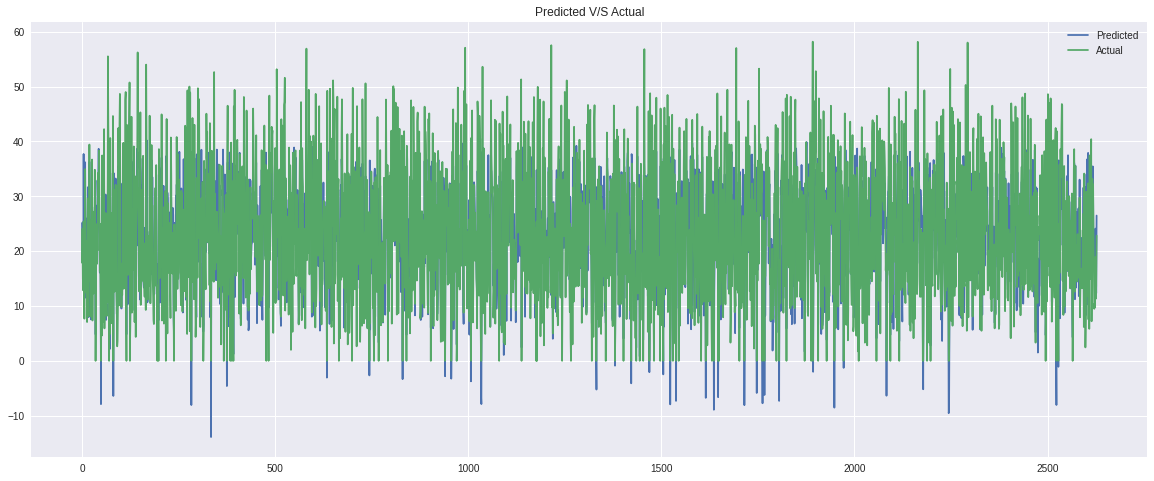

In [ ]:

# plotting predicted v/s actual
plot_Pred_vs_actual(y_pred,y_test)

Text(0.5, 0, 'y_predicted')

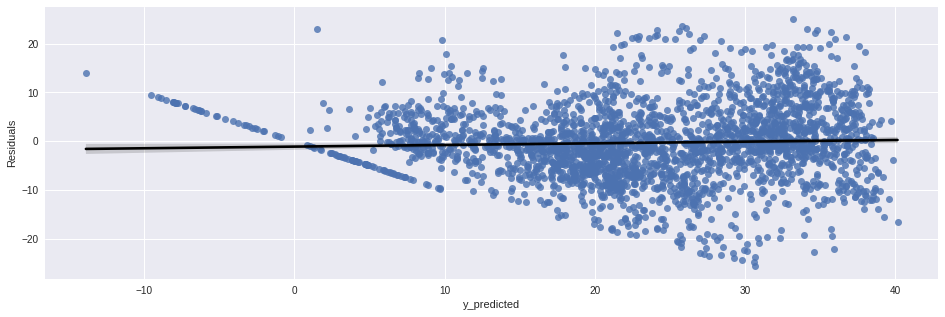

In [ ]:

# Check Homoscedasticity by plotting y_predicted values and the residuals
plt.figure(figsize=(16,5))
sns.regplot(x=y_pred,y=y_test-y_pred,line_kws={'color':'black'})
plt.ylabel('Residuals')
plt.xlabel('y_predicted')

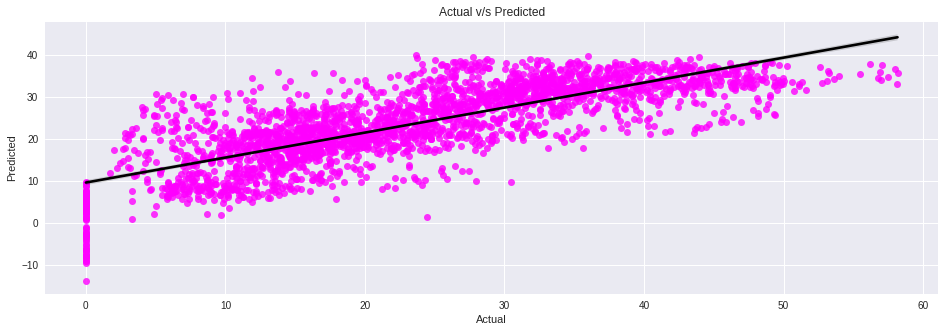

In [ ]:
# Checking how predicted values and actual values are close  to the regression line
plot_scatter(y_pred,y_test)
     

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


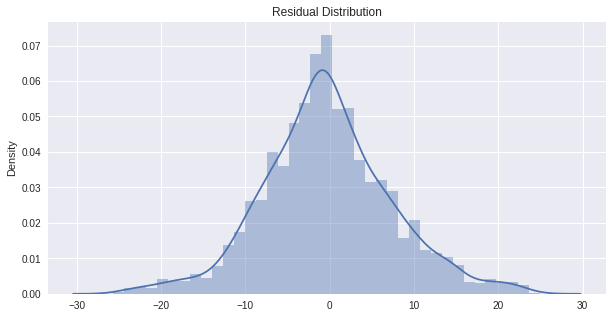

In [ ]:
# Residuals of the regression are normally distributed.(Homoscedasticity refers to whether these residuals are equally distributed)
Residual_distPlot(y_pred,y_test)

As We have saw in linear regression,lasso,ridge and elastic net we are getting almost similar r2 scores.

# DECISION TREE REGRESSOR

In [ ]:

#import decsion tree packages
from sklearn.tree import DecisionTreeRegressor

# create an object
D_tree=DecisionTreeRegressor(max_depth=9,splitter='best',max_features='auto')

# fitting Xtrain yTrain
D_tree.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=9, max_features='auto')

In [ ]:
# Check score on Train dataset
D_tree.score(X_train,y_train)
     


0.8814250872495163

In [ ]:
# check score on Test dataset.
D_tree.score(X_test,y_test)
     

0.8376833808923072

In [ ]:

#  predicting y_train_predictions from  X train values
y_pred_train=D_tree.predict(X_train)
#  predicting y_predictions from  X test values
y_pred=D_tree.predict(X_test)

In [ ]:

# Evaluation of training data set

#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_train,y_pred_train)
print(f"The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_train,y_pred_train)
print(f"The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_train,y_pred_train)
print(f"The R2 Score is {R2}.")

The Mean Absolute Error (MAE) is 2.88551652156907.
The Mean Squred Error(MSE) is 18.44462508772692.
The Root Mean Squared Error(RMSE) is 4.294720606480347.
The R2 Score is 0.8814250872495163.


In [ ]:

# creating dictionary  of Decison tree results( Train dataset)
train_dict={'Model':"Decision Tree Regressor-GridSearchCV",
             'MAE':round(MAE,4),
             'MSE':round(MSE,4),
             'RMSE':round(RMSE,4),
             'R2_score':round(R2,4)}

In [ ]:

traing_results_df=traing_results_df.append(train_dict,ignore_index=True)
traing_results_df

Model     MAE      MSE    RMSE  R2_score
0                     Linear Regression  5.8555  60.2995  7.7653    0.6124
1                                 Lasoo  5.8691  60.4640  7.7759    0.6113
2                    Ridge GridSearchCV  5.8691  60.4640  7.7759    0.6113
3       ElasticNet(GridSearchCV-Tunned)  5.8932  60.9027  7.8040    0.6085
4  Decision Tree Regressor-GridSearchCV  2.8855  18.4446  4.2947    0.8814

In [ ]:

# Evaluation of Test data set

#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_test,y_pred)
print(f" The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_test,y_pred)
print(f" The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_test,y_pred)
print(f"The R2 Score is {R2}.")

 The Mean Absolute Error (MAE) is 3.398907197675181.
 The Mean Squred Error(MSE) is 24.931521992228145.
The Root Mean Squared Error(RMSE) is 4.993147503552057.
The R2 Score is 0.8376833808923072.


In [ ]:

test_dict={'Model':"Decision Tree Regressor(GridsearchCV)",
             'MAE':round(MAE,4),
             'MSE':round(MSE,4),
             'RMSE':round(RMSE,4),
             'R2_score':round(R2,4)}


In [ ]:

test_results_df=test_results_df.append(test_dict,ignore_index=True)
test_results_df

Model     MAE      MSE    RMSE  R2_score
0                      Linear Regression  5.8342  58.6242  7.6566    0.6183
1                                  Lasso  5.8506  58.7927  7.6676    0.6172
2             Ridge(GridsearchCv Tunned)  5.8506  58.7927  7.6676    0.6172
3        ElasticNet(GridSearchCV-Tunned)  5.8711  59.2909  7.7001    0.6140
4  Decision Tree Regressor(GridsearchCV)  3.3989  24.9315  4.9931    0.8377

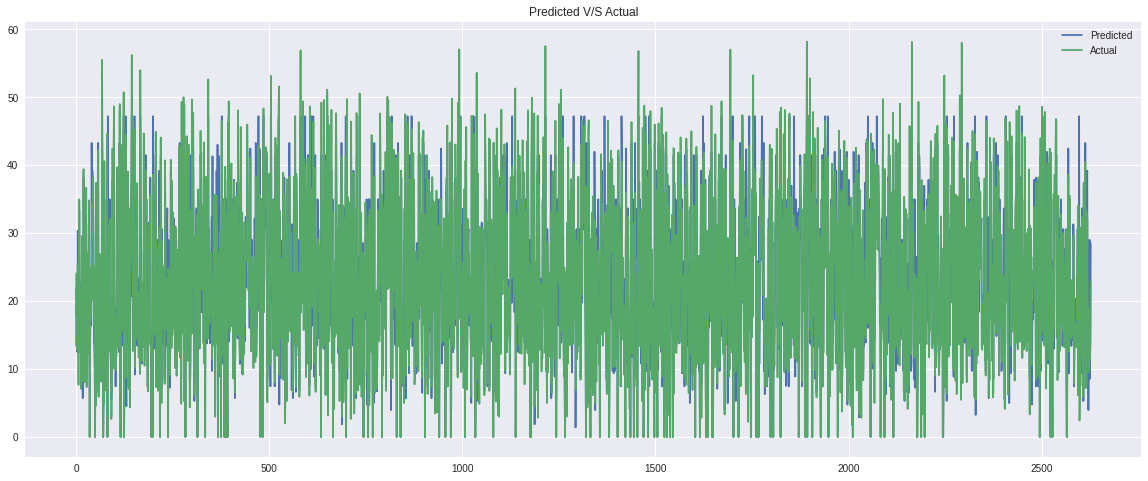

In [ ]:

plot_Pred_vs_actual(y_pred,y_test)

Text(0.5, 0, 'y_predicted')

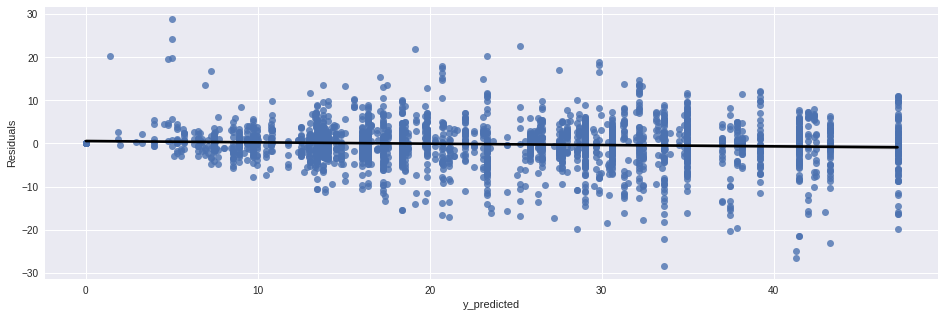

In [ ]:
# Check Homoscedasticity by plotting y_predicted values and the residuals
plt.figure(figsize=(16,5))
sns.regplot(x=y_pred,y=y_test-y_pred,line_kws={'color':'black'})
plt.ylabel('Residuals')
plt.xlabel('y_predicted')

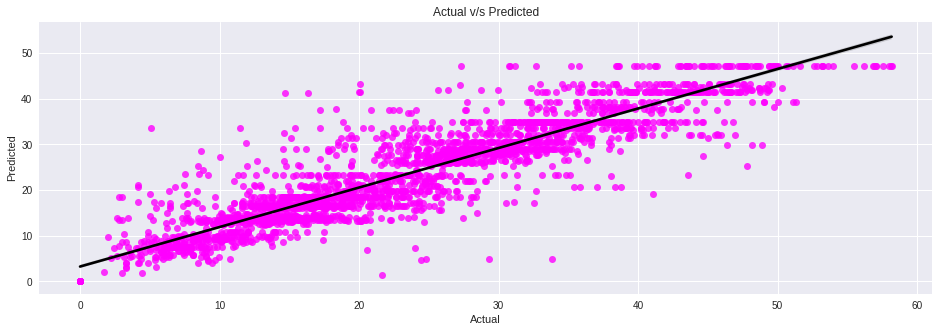

In [ ]:

# Checking how predicted values and actual values are close  to the regression line
plot_scatter(y_pred,y_test)
     

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


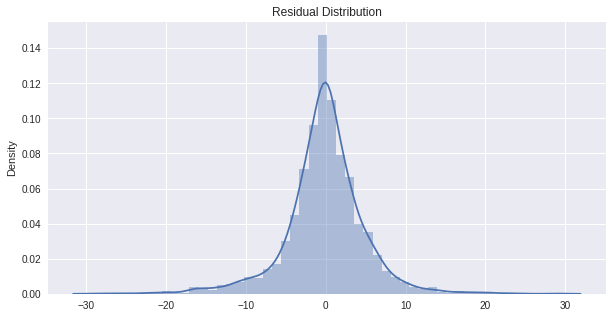

In [ ]:

# Residuals of the regression are normally distributed.(Homoscedasticity refers to whether these residuals are equally distributed)
Residual_distPlot(y_pred,y_test)

# HYPERPARAMETER TUNING

In [ ]:

# Hyper parameters range intialization for tuning 
tree=DecisionTreeRegressor()
parameters={'criterion': ["mae"],
            "splitter":["best","random"],
            "max_depth" : [3,5,7,9,None],
           "max_features":["auto","log2"] }

In [ ]:
  

tuning_model=GridSearchCV(tree,param_grid=parameters,scoring='neg_mean_squared_error',cv=3,verbose=0)
tuning_model.fit(X_train,y_train)


/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarni

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['mae'], 'max_depth': [3, 5, 7, 9, None],
                         'max_features': ['auto', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [ ]:

tuning_model.best_params_

{'criterion': 'mae',
 'max_depth': 9,
 'max_features': 'auto',
 'splitter': 'best'}

In [ ]:

D_tree=DecisionTreeRegressor(max_depth=9,max_features='auto',splitter='best')
D_tree.fit(X_train,y_train)
     

DecisionTreeRegressor(max_depth=9, max_features='auto')

Text(0.5, 0, 'Relative Importance')

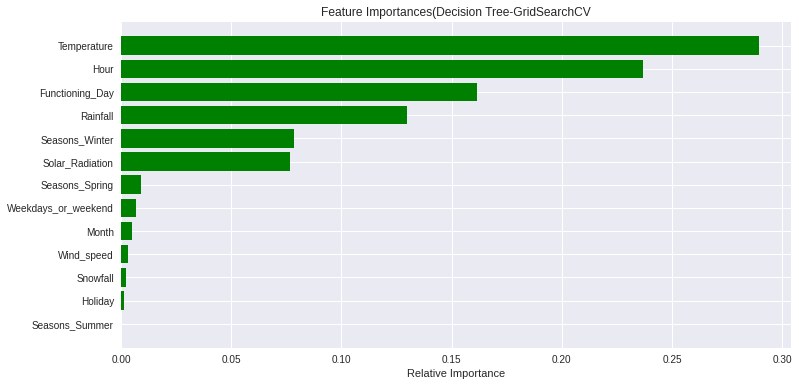

In [ ]:

imp_variables=X.columns
importances = D_tree.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(12,6))
plt.title('Feature Importances(Decision Tree-GridSearchCV')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), imp_variables[indices])
plt.xlabel('Relative Importance')

We have applied this best parametrs to above Decsion tree regressor model

# RANDOM FOREST REGRESSOR

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(X_train,y_train)
     

RandomForestRegressor()

In [ ]:
rf.score(X_train,y_train)

0.9860574352682591

In [ ]:
rf.score(X_test,y_test)
     

0.9069212922051711

In [ ]:
y_pred_train=rf.predict(X_train)
y_pred=rf.predict(X_test)
     

In [ ]:
# Evaluation of training data set

#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_train,y_pred_train)
print(f"The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_train,y_pred_train)
print(f"The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_train,y_pred_train)
print(f"The R2 Score is {R2}.")
     

The Mean Absolute Error (MAE) is 0.9380191327162734.
The Mean Squred Error(MSE) is 2.1688009147388287.
The Root Mean Squared Error(RMSE) is 1.4726849339688475.
The R2 Score is 0.9860574352682591.


In [ ]:
train_dict={'Model':"Random Forest",
             'MAE':round(MAE,4),
             'MSE':round(MSE,4),
             'RMSE':round(RMSE,4),
             'R2_score':round(R2,4)}


In [ ]:

traing_results_df=traing_results_df.append(train_dict,ignore_index=True)
traing_results_df



Model     MAE      MSE    RMSE  R2_score
0                     Linear Regression  5.8555  60.2995  7.7653    0.6124
1                                 Lasoo  5.8691  60.4640  7.7759    0.6113
2                    Ridge GridSearchCV  5.8691  60.4640  7.7759    0.6113
3       ElasticNet(GridSearchCV-Tunned)  5.8932  60.9027  7.8040    0.6085
4  Decision Tree Regressor-GridSearchCV  2.8855  18.4446  4.2947    0.8814
5                         Random Forest  0.9380   2.1688  1.4727    0.9861

In [ ]:
# Evaluation of Test data set

#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_test,y_pred)
print(f" The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_test,y_pred)
print(f" The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_test,y_pred)
print(f"The R2 Score is {R2}.")

 The Mean Absolute Error (MAE) is 2.488035653506748.
 The Mean Squred Error(MSE) is 14.2967113481787.
The Root Mean Squared Error(RMSE) is 3.781099224852305.
The R2 Score is 0.9069212922051711.


In [ ]:
test_dict={'Model':"Radom forest",
             'MAE':round(MAE,4),
             'MSE':round(MSE,4),
             'RMSE':round(RMSE,4),
             'R2_score':round(R2,4)}



In [ ]:
test_results_df=test_results_df.append(test_dict,ignore_index=True)
test_results_df
     

Model     MAE      MSE    RMSE  R2_score
0                      Linear Regression  5.8342  58.6242  7.6566    0.6183
1                                  Lasso  5.8506  58.7927  7.6676    0.6172
2             Ridge(GridsearchCv Tunned)  5.8506  58.7927  7.6676    0.6172
3        ElasticNet(GridSearchCV-Tunned)  5.8711  59.2909  7.7001    0.6140
4  Decision Tree Regressor(GridsearchCV)  3.3989  24.9315  4.9931    0.8377
5                           Radom forest  2.4880  14.2967  3.7811    0.9069

# GridSearchCV On random Forest

In [ ]:
param={'n_estimators':[25,50,40,80,100],'max_depth':[3,4,5,6,7,8,9]}

In [ ]:

rf_reg=RandomForestRegressor()
rf_tuning=GridSearchCV(rf_reg,param_grid=param,scoring='neg_mean_squared_error',cv=5)
rf_tuning.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9],
                         'n_estimators': [25, 50, 40, 80, 100]},
             scoring='neg_mean_squared_error')

In [ ]:
rf_tuning.best_params_
     

{'max_depth': 9, 'n_estimators': 25}

In [ ]:
rf=RandomForestRegressor(max_depth=9,n_estimators=100)
rf.fit(X_train,y_train)

RandomForestRegressor(max_depth=9)

In [ ]:
rf.score(X_train,y_train)

0.9035897904615973

In [ ]:
rf.score(X_test,y_test)
     

0.8774197199070852

In [ ]:
y_pred_train=rf.predict(X_train)
y_pred=rf.predict(X_test)
     

In [ ]:
# Evaluation of training data set

#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_train,y_pred_train)
print(f"The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_train,y_pred_train)
print(f"The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_train,y_pred_train)
print(f"The R2 Score is {R2}.")


The Mean Absolute Error (MAE) is 2.6327585696602647.
The Mean Squred Error(MSE) is 14.996849909617808.
The Root Mean Squared Error(RMSE) is 3.8725766499344862.
The R2 Score is 0.9035897904615973.


In [ ]:
train_dict={'Model':"Random Forest-GridSearchCv",
             'MAE':round(MAE,4),
             'MSE':round(MSE,4),
             'RMSE':round(RMSE,4),
             'R2_score':round(R2,4)}



In [ ]:
traing_results_df=traing_results_df.append(train_dict,ignore_index=True)
traing_results_df


Model     MAE      MSE    RMSE  R2_score
0                     Linear Regression  5.8555  60.2995  7.7653    0.6124
1                                 Lasoo  5.8691  60.4640  7.7759    0.6113
2                    Ridge GridSearchCV  5.8691  60.4640  7.7759    0.6113
3       ElasticNet(GridSearchCV-Tunned)  5.8932  60.9027  7.8040    0.6085
4  Decision Tree Regressor-GridSearchCV  2.8855  18.4446  4.2947    0.8814
5                         Random Forest  0.9380   2.1688  1.4727    0.9861
6            Random Forest-GridSearchCv  2.6328  14.9968  3.8726    0.9036

In [ ]:
# Evaluation of Test data set

#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_test,y_pred)
print(f" The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_test,y_pred)
print(f" The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_test,y_pred)
print(f"The R2 Score is {R2}.")
     

 The Mean Absolute Error (MAE) is 2.9567070419125088.
 The Mean Squred Error(MSE) is 18.828096381938185.
The Root Mean Squared Error(RMSE) is 4.33913544176005.
The R2 Score is 0.8774197199070852.


In [ ]:
test_dict={'Model':"Random Forest-GridSearchCv",
             'MAE':round(MAE,4),
             'MSE':round(MSE,4),
             'RMSE':round(RMSE,4),
             'R2_score':round(R2,4)}


test_results_df=test_results_df.append(test_dict,ignore_index=True)
test_results_df
     


Model     MAE      MSE    RMSE  R2_score
0                      Linear Regression  5.8342  58.6242  7.6566    0.6183
1                                  Lasso  5.8506  58.7927  7.6676    0.6172
2             Ridge(GridsearchCv Tunned)  5.8506  58.7927  7.6676    0.6172
3        ElasticNet(GridSearchCV-Tunned)  5.8711  59.2909  7.7001    0.6140
4  Decision Tree Regressor(GridsearchCV)  3.3989  24.9315  4.9931    0.8377
5                           Radom forest  2.4880  14.2967  3.7811    0.9069
6             Random Forest-GridSearchCv  2.9567  18.8281  4.3391    0.8774

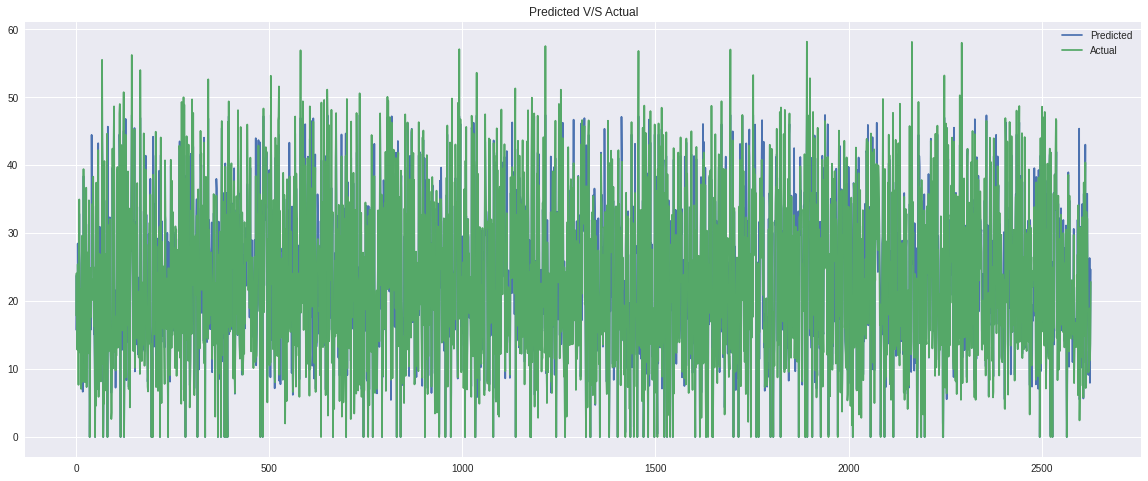

In [ ]:
plot_Pred_vs_actual(y_pred,y_test)

Text(0.5, 0, 'y_predicted')

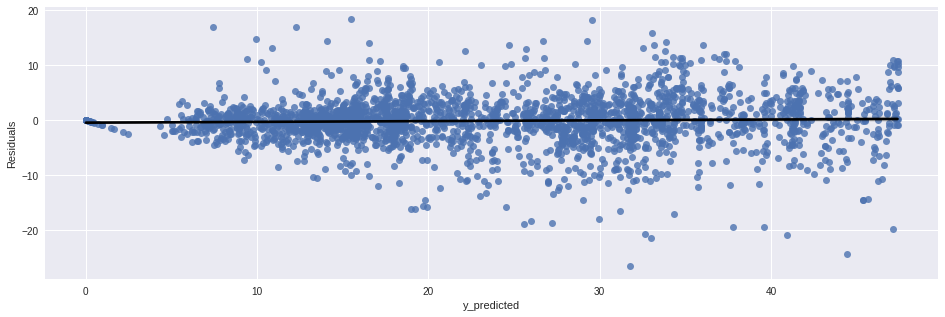

In [ ]:

# Check Homoscedasticity by plotting y_predicted values and the residuals
plt.figure(figsize=(16,5))
sns.regplot(x=y_pred,y=y_test-y_pred,line_kws={'color':'black'})
plt.ylabel('Residuals')
plt.xlabel('y_predicted')

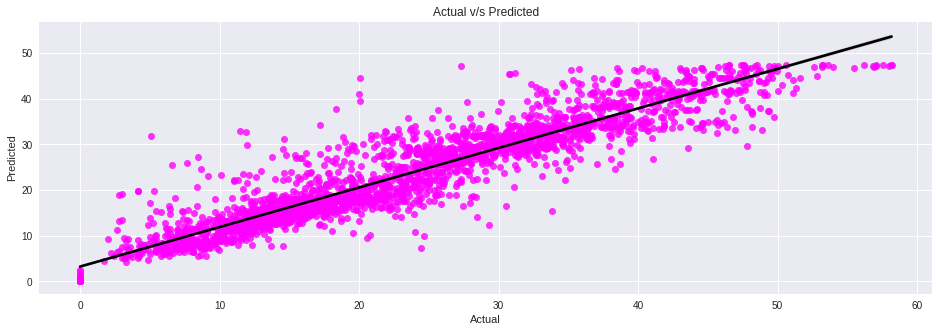

In [ ]:

# Checking how predicted values and actual values are close  to the regression line
plot_scatter(y_pred,y_test)
     

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


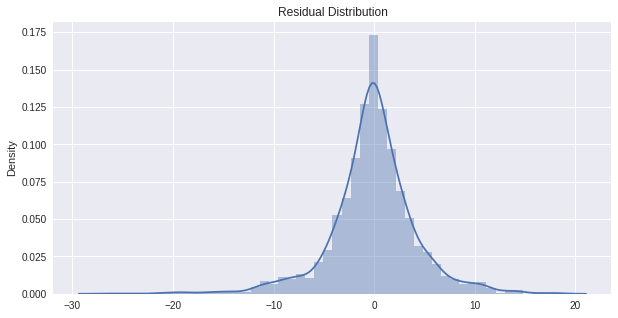

In [ ]:
# Residuals of the regression are normally distributed.(Homoscedasticity refers to whether these residuals are equally distributed)

Residual_distPlot(y_pred,y_test)

Text(0.5, 0, 'Relative Importance')

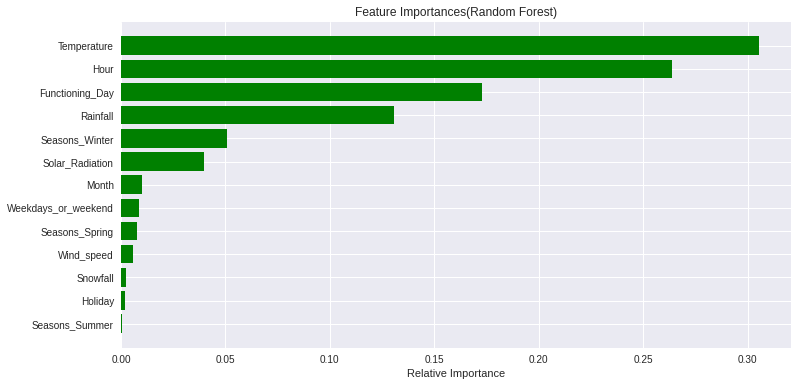

In [ ]:
imp_variables=X.columns
importances = rf.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(12,6))
plt.title('Feature Importances(Random Forest)')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), imp_variables[indices])
plt.xlabel('Relative Importance')
     

**By looking at the graph we can say that temperature and hours plays very important role on bike rentals.**

#GRADIENT BOOSTING REGRESSOR

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gradboo_reg=GradientBoostingRegressor()
gradboo_reg.fit(X_train,y_train)

GradientBoostingRegressor()

In [ ]:
gradboo_reg.score(X_train,y_train)

0.8680334065097101

In [ ]:
gradboo_reg.score(X_train,y_train)

0.8680334065097101

In [ ]:
y_pred_train=gradboo_reg.predict(X_train)
y_pred=gradboo_reg.predict(X_test)

In [ ]:
# Evaluation of training data set

#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_train,y_pred_train)
print(f"The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_train,y_pred_train)
print(f"The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_train,y_pred_train)
print(f"The R2 Score is {R2}.")


The Mean Absolute Error (MAE) is 3.1772012244215926.
The Mean Squred Error(MSE) is 20.527734615794028.
The Root Mean Squared Error(RMSE) is 4.530754309802511.
The R2 Score is 0.8680334065097101.


In [ ]:

train_dict={'Model':"Gardient boosting Regression",
             'MAE':round(MAE,4),
             'MSE':round(MSE,4),
             'RMSE':round(RMSE,4),
             'R2_score':round(R2,4)}




traing_results_df=traing_results_df.append(train_dict,ignore_index=True)
traing_results_df

Model     MAE      MSE    RMSE  R2_score
0                     Linear Regression  5.8555  60.2995  7.7653    0.6124
1                                 Lasoo  5.8691  60.4640  7.7759    0.6113
2                    Ridge GridSearchCV  5.8691  60.4640  7.7759    0.6113
3       ElasticNet(GridSearchCV-Tunned)  5.8932  60.9027  7.8040    0.6085
4  Decision Tree Regressor-GridSearchCV  2.8855  18.4446  4.2947    0.8814
5                         Random Forest  0.9380   2.1688  1.4727    0.9861
6            Random Forest-GridSearchCv  2.6328  14.9968  3.8726    0.9036
7          Gardient boosting Regression  3.1772  20.5277  4.5308    0.8680

In [ ]:
# Evaluation of Test data set

#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_test,y_pred)
print(f" The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_test,y_pred)
print(f" The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_test,y_pred)
print(f"The R2 Score is {R2}.")

 The Mean Absolute Error (MAE) is 3.283990685553747.
 The Mean Squred Error(MSE) is 21.679793198929538.
The Root Mean Squared Error(RMSE) is 4.656156483509713.
The R2 Score is 0.8588537540507489.


In [ ]:
test_dict={'Model':"Gradient Boosting Regression",
             'MAE':round(MAE,4),
             'MSE':round(MSE,4),
             'RMSE':round(RMSE,4),
             'R2_score':round(R2,4)}


test_results_df=test_results_df.append(test_dict,ignore_index=True)
test_results_df

Model     MAE      MSE    RMSE  R2_score
0                      Linear Regression  5.8342  58.6242  7.6566    0.6183
1                                  Lasso  5.8506  58.7927  7.6676    0.6172
2             Ridge(GridsearchCv Tunned)  5.8506  58.7927  7.6676    0.6172
3        ElasticNet(GridSearchCV-Tunned)  5.8711  59.2909  7.7001    0.6140
4  Decision Tree Regressor(GridsearchCV)  3.3989  24.9315  4.9931    0.8377
5                           Radom forest  2.4880  14.2967  3.7811    0.9069
6             Random Forest-GridSearchCv  2.9567  18.8281  4.3391    0.8774
7           Gradient Boosting Regression  3.2840  21.6798  4.6562    0.8589

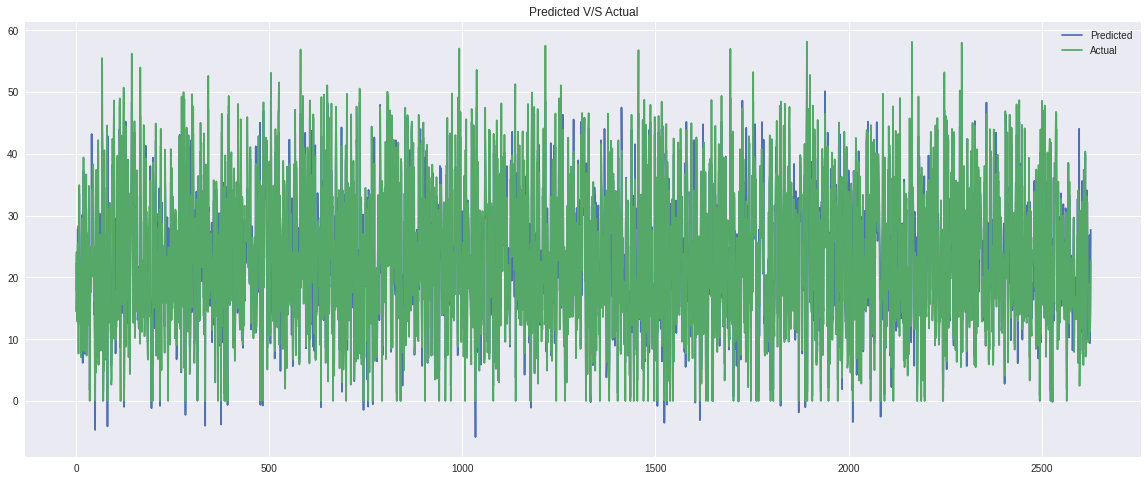

In [ ]:
plot_Pred_vs_actual(y_pred,y_test)

Text(0.5, 0, 'y_predicted')

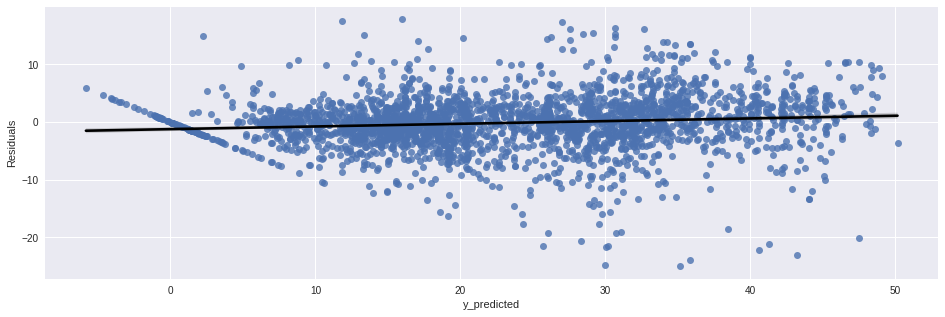

In [ ]:
# Check Homoscedasticity by plotting y_predicted values and the residuals
plt.figure(figsize=(16,5))
sns.regplot(x=y_pred,y=y_test-y_pred,line_kws={'color':'black'})
plt.ylabel('Residuals')
plt.xlabel('y_predicted')
     

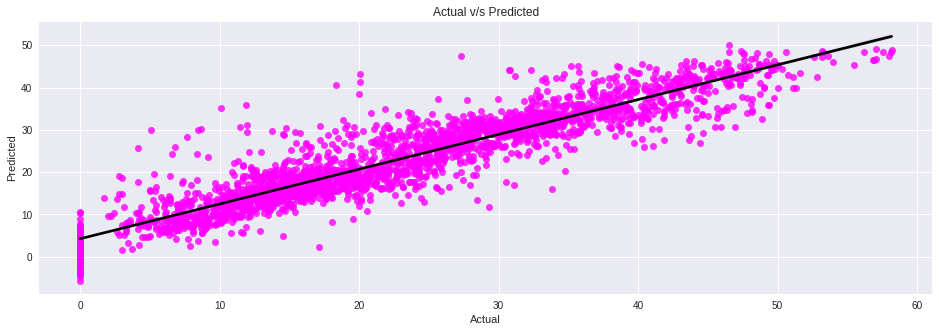

In [ ]:
# Checking how predicted values and actual values are close  to the regression line
plot_scatter(y_pred,y_test)
     


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


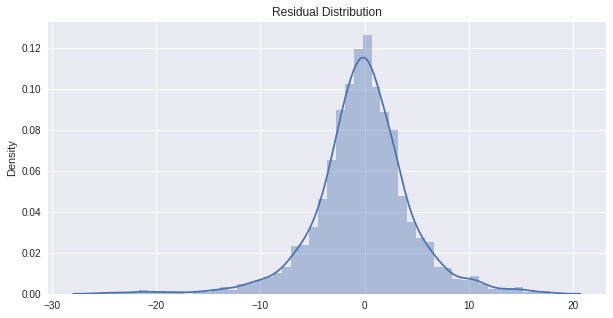

In [ ]:
# Residuals of the regression are normally distributed.(Homoscedasticity refers to whether these residuals are equally distributed)
Residual_distPlot(y_pred,y_test)

# GridSearchCV on Gradient Boosting Regressor

In [ ]:
gbr=GradientBoostingRegressor()
     

In [ ]:
parameters = {'learning_rate': [0.01,0.02,0.03,0.04],
                  'subsample'    : [0.9, 0.5, 0.2, 0.1],
                  'n_estimators' : [50,80,100,150],
                  'max_depth'    : [4,6,8,10]
                 }


       
# 1)n_estimators : The number of boosting stages to perform. Gradient boosting is fairly robust to over-fitting so a large number usually results in better performance.
# 2)learning_rate:Learning rate shrinks the contribution of each tree by learning_rate. There is a trade-off between learning_rate and n_estimators.
# 3)max_depth : Maximum depth of the individual regression estimators. The maximum depth limits the number of nodes in the tree. Tune this parameter for best performance; 
#the best value depends on the interaction of the input variables.

#4)subsample, default=1.0
#The fraction of samples to be used for fitting the individual base learners. 
#If smaller than 1.0 this results in Stochastic Gradient Boosting. 
#subsample interacts with the parameter n_estimators. 
#Choosing subsample < 1.0 leads to a reduction of variance and an increase in bias.

In [ ]:

#Gridsearch
grad_boo_tuning=GridSearchCV(gbr,param_grid=parameters,cv=4,n_jobs=1)
# fitting gridsearc on xtrain and ytrain
grad_boo_tuning.fit(X_train,y_train)

GridSearchCV(cv=4, estimator=GradientBoostingRegressor(), n_jobs=1,
             param_grid={'learning_rate': [0.01, 0.02, 0.03, 0.04],
                         'max_depth': [4, 6, 8, 10],
                         'n_estimators': [50, 80, 100, 150],
                         'subsample': [0.9, 0.5, 0.2, 0.1]})

In [ ]:

# get best paramters to use
grad_boo_tuning.best_params_

{'learning_rate': 0.04, 'max_depth': 8, 'n_estimators': 150, 'subsample': 0.9}

In [ ]:
 # USing best paramters tunned by GridsearchCv 
gradboo_tuned = GradientBoostingRegressor(learning_rate=0.04,max_depth=8,n_estimators=150,subsample=0.9)
gradboo_tuned.fit(X_train,y_train)

GradientBoostingRegressor(learning_rate=0.04, max_depth=8, n_estimators=150,
                          subsample=0.9)

In [ ]:
# checking score on train data
gradboo_tuned.score(X_train,y_train)

0.9689472682589305

In [ ]:

#checking score on test data
gradboo_tuned.score(X_test,y_test)

0.9131193524689049

In [ ]:

# predicting y values of train and test data.
#  y preidictions on train data.
y_pred_train=gradboo_tuned.predict(X_train)
# y predictions on test data
y_pred=gradboo_tuned.predict(X_test)

In [ ]:

# Evaluation of training data set

#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_train,y_pred_train)
print(f"The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_train,y_pred_train)
print(f"The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_train,y_pred_train)
print(f"The R2 Score is {R2}.")
     

The Mean Absolute Error (MAE) is 1.5148077291820308.
The Mean Squred Error(MSE) is 4.830330308730911.
The Root Mean Squared Error(RMSE) is 2.197801244137174.
The R2 Score is 0.9689472682589305.


In [ ]:
train_dict={'Model':"Gradient Boosting Regression(GridSearchCV)",
             'MAE':round(MAE,4),
             'MSE':round(MSE,4),
             'RMSE':round(RMSE,4),
             'R2_score':round(R2,4)}




traing_results_df=traing_results_df.append(train_dict,ignore_index=True)
traing_results_df

Model     MAE      MSE    RMSE  \
0                           Linear Regression  5.8555  60.2995  7.7653   
1                                       Lasoo  5.8691  60.4640  7.7759   
2                          Ridge GridSearchCV  5.8691  60.4640  7.7759   
3             ElasticNet(GridSearchCV-Tunned)  5.8932  60.9027  7.8040   
4        Decision Tree Regressor-GridSearchCV  2.8855  18.4446  4.2947   
5                               Random Forest  0.9380   2.1688  1.4727   
6                  Random Forest-GridSearchCv  2.6328  14.9968  3.8726   
7                Gardient boosting Regression  3.1772  20.5277  4.5308   
8  Gradient Boosting Regression(GridSearchCV)  1.5148   4.8303  2.1978   

   R2_score  
0    0.6124  
1    0.6113  
2    0.6113  
3    0.6085  
4    0.8814  
5    0.9861  
6    0.9036  
7    0.8680  
8    0.9689

In [ ]:
# Evaluation of Test data set

#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_test,y_pred)
print(f" The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_test,y_pred)
print(f" The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_test,y_pred)
print(f"The R2 Score is {R2}.")
     

 The Mean Absolute Error (MAE) is 2.378169466549558.
 The Mean Squred Error(MSE) is 13.344701155852633.
The Root Mean Squared Error(RMSE) is 3.6530399882635605.
The R2 Score is 0.9131193524689049.


In [ ]:

test_dict={'Model':"Gradient Boosting Regression(GridSearchCV)",
             'MAE':round(MAE,4),
             'MSE':round(MSE,4),
             'RMSE':round(RMSE,4),
             'R2_score':round(R2,4)}


test_results_df=test_results_df.append(test_dict,ignore_index=True)
test_results_df
     

Model     MAE      MSE    RMSE  \
0                           Linear Regression  5.8342  58.6242  7.6566   
1                                       Lasso  5.8506  58.7927  7.6676   
2                  Ridge(GridsearchCv Tunned)  5.8506  58.7927  7.6676   
3             ElasticNet(GridSearchCV-Tunned)  5.8711  59.2909  7.7001   
4       Decision Tree Regressor(GridsearchCV)  3.3989  24.9315  4.9931   
5                                Radom forest  2.4880  14.2967  3.7811   
6                  Random Forest-GridSearchCv  2.9567  18.8281  4.3391   
7                Gradient Boosting Regression  3.2840  21.6798  4.6562   
8  Gradient Boosting Regression(GridSearchCV)  2.3782  13.3447  3.6530   

   R2_score  
0    0.6183  
1    0.6172  
2    0.6172  
3    0.6140  
4    0.8377  
5    0.9069  
6    0.8774  
7    0.8589  
8    0.9131

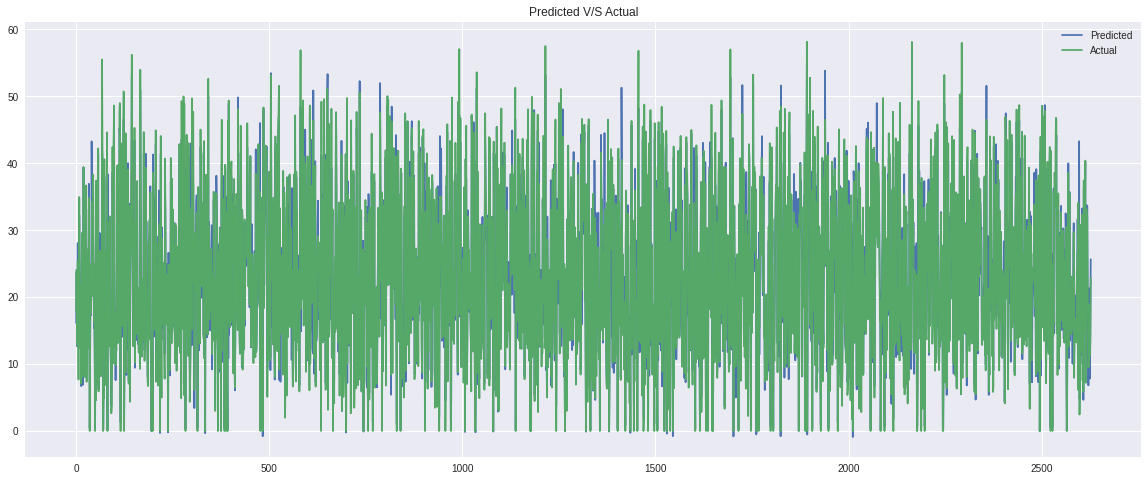

In [ ]:
plot_Pred_vs_actual(y_pred,y_test)
     

Text(0.5, 0, 'y_predicted')

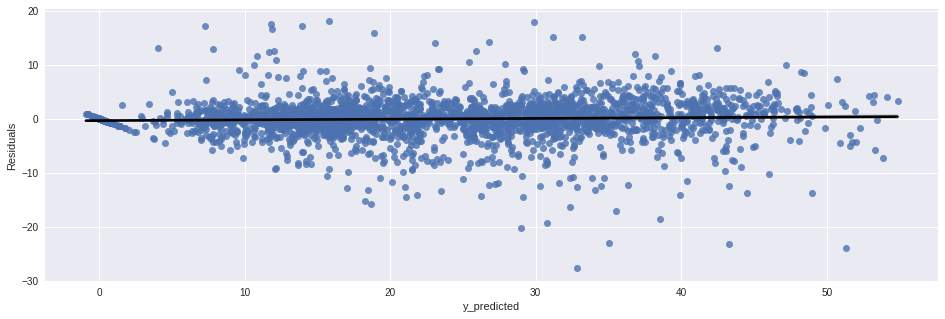

In [ ]:
# Check Homoscedasticity by plotting y_predicted values and the residuals
plt.figure(figsize=(16,5))
sns.regplot(x=y_pred,y=y_test-y_pred,line_kws={'color':'black'})
plt.ylabel('Residuals')
plt.xlabel('y_predicted')
     

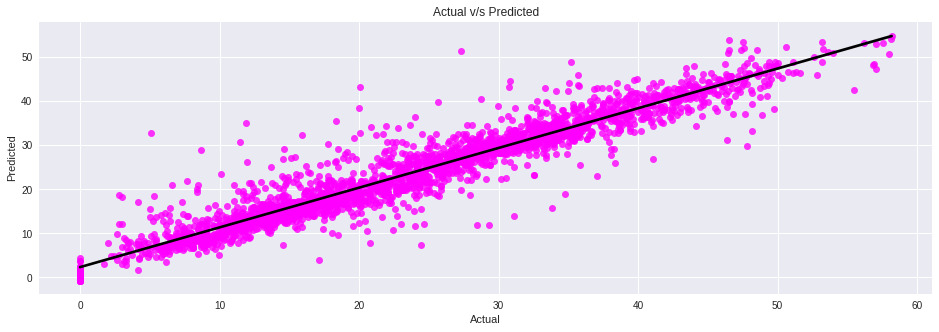

In [ ]:
# Checking how predicted values and actual values are close  to the regression line
plot_scatter(y_pred,y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


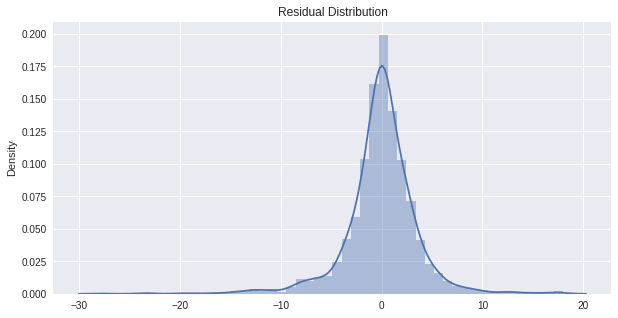

In [ ]:
# Residuals of the regression are normally distributed.(Homoscedasticity refers to whether these residuals are equally distributed)

Residual_distPlot(y_pred,y_test)
     


Text(0.5, 0, 'Relative Importance')

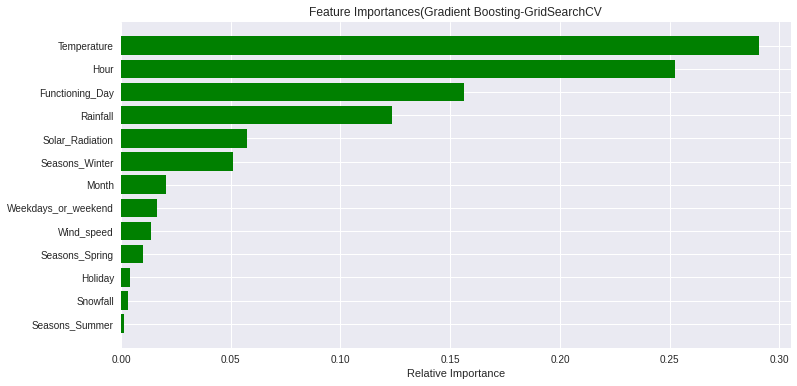

In [ ]:

# checking Feature imporatance
imp_variables=X.columns
importances = gradboo_tuned.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(12,6))
plt.title('Feature Importances(Gradient Boosting-GridSearchCV')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), imp_variables[indices])
plt.xlabel('Relative Importance')

In [ ]:

# Check Final dataframe of All models
final_result=pd.concat([traing_results_df,test_results_df],keys=['Training set','Test set'])
final_result
     

Model     MAE      MSE  \
Training set 0                           Linear Regression  5.8555  60.2995   
             1                                       Lasoo  5.8691  60.4640   
             2                          Ridge GridSearchCV  5.8691  60.4640   
             3             ElasticNet(GridSearchCV-Tunned)  5.8932  60.9027   
             4        Decision Tree Regressor-GridSearchCV  2.8855  18.4446   
             5                               Random Forest  0.9380   2.1688   
             6                  Random Forest-GridSearchCv  2.6328  14.9968   
             7                Gardient boosting Regression  3.1772  20.5277   
             8  Gradient Boosting Regression(GridSearchCV)  1.5148   4.8303   
Test set     0                           Linear Regression  5.8342  58.6242   
             1                                       Lasso  5.8506  58.7927   
             2                  Ridge(GridsearchCv Tunned)  5.8506  58.7927   
             3             ElasticNet(GridSearchCV-Tunned)  5.8711  59.2909   
             4       Decision Tree Regressor(GridsearchCV)  3.3989  24.9315   
             5                                Radom forest  2.4880  14.2967   
             6                  Random Forest-GridSearchCv  2.9567  18.8281   
             7                Gradient Boosting Regression  3.2840  21.6798   
             8  Gradient Boosting Regression(GridSearchCV)  2.3782  13.3447   

                  RMSE  R2_score  
Training set 0  7.7653    0.6124  
             1  7.7759    0.6113  
             2  7.7759    0.6113  
             3  7.8040    0.6085  
             4  4.2947    0.8814  
             5  1.4727    0.9861  
             6  3.8726    0.9036  
             7  4.5308    0.8680  
             8  2.1978    0.9689  
Test set     0  7.6566    0.6183  
             1  7.6676    0.6172  
             2  7.6676    0.6172  
             3  7.7001    0.6140  
             4  4.9931    0.8377  
             5  3.7811    0.9069  
             6  4.3391    0.8774  
             7  4.6562    0.8589  
             8  3.6530    0.9131

# Conclusions

As we have calculated MAE,MSE,RMSE and R2 score for each model. Based on r2 score will decide our model performance.

Our assumption: if the differnece of R2 score between Train data and Test is more than 5 % we will consider it as overfitting

# Linear,Lasso,Ridge and ElasticNet.

1)From The above data frame, we can see that linear,Lasso,Ridge and Elastic regression models have almost similar R2 scores(61%) on both training and test data.(Even after using GridserachCV we have got similar results as of base models).

# Decision Tree Regressor:

On Decision tree regressor model, without hyperparameter tuning we got r2 score as 100% on training data and on test data it was very less. 

Thus our model memorised the data.So it was a overfitted model.
After hyperparameter tuning we got r2 score as 88% on training data and 83% on test data which is quite good for us.

# Random Forest:

On Random Forest regressor model, without hyperparameter tuning we got r2 score as 98% on training data and 90% on test data. Thus our model memorised the data.So it was a overfitted model, as per our assumption

After hyperparameter tuning we got r2 score as 90% on training data and 87% on test data which is very good for us.


# Gradient Boosting Regression(Gradient Boosting Machine):

On Random Forest regressor model, without hyperparameter tuning we got r2 score as 86% on training data and 85% on test data.Our model performed well without hyperparameter tuning.

After hyperparameter tuning we got r2 score as 96% on training data and 91% on test data,thus we improved the model performance by hyperparameter tuning.

# Thus Gradient Boosting Regression(GridSearchCV) and Random forest(gridSearchCv) gives good r2 scores. We can deploy this models.

In terms of features, Temperature and Hours plays very important role in following 3 models. Other features importances are different in 3 models.
